In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')

# Load your diabetes dataset CSV file
df = pd.read_csv("C:/Users/sit/Documents/01Development/Capstone2/sctp-capstone-ii-25/sctp-capstone-ii-25/Feature2/diabetes_dataset_kaggle.csv")

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (100000, 16)


In [3]:
# Import libraries and load CSV
# Basic dataset info
# Missing Values analysis
# Target variable analysis
# Feature distribution analysis
# Box plots for outlier detection
# correlation analysis
# scatter plots and relationships and pair plots
# Advanced statistical tests
# Feature Engineering insights
# Data Quality Report 
# Summary and key insights 

In [4]:
# Dataset shape and info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# First few rows
print("\nFirst 5 rows:")
print(df.head())

# Last few rows
print("\nLast 5 rows:")
print(df.tail())

# Column names
print("\nColumn Names:")
print(df.columns.tolist())

# Data types
print("\nData Types:")
print(df.dtypes)

# Check unique values in each column
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Dataset Shape: (100000, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_gluc

In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Missing values percentage
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing Values Percentage:")
print(missing_percent[missing_percent > 0])

# Visualize missing values if any exist
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
    plt.title('Missing Values Heatmap')
    plt.show()
else:
    print("No missing values found!")

Missing Values:
year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

Missing Values Percentage:
Series([], dtype: float64)
No missing values found!


In [6]:
# STATISTICAL SUMMARY 
# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# Statistical summary with more details
print("\nDetailed Statistics (including categorical):")
print(df.describe(include='all'))

# For numerical columns only
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"\nNumerical columns: {list(numerical_cols)}")

if len(numerical_cols) > 0:
    print("\nVariance:")
    print(df[numerical_cols].var())
    
    print("\nStandard Deviation:")
    print(df[numerical_cols].std())

Descriptive Statistics:
                year            age  race:AfricanAmerican     race:Asian  \
count  100000.000000  100000.000000         100000.000000  100000.000000   
mean     2018.360820      41.885856              0.202230       0.200150   
std         1.345239      22.516840              0.401665       0.400114   
min      2015.000000       0.080000              0.000000       0.000000   
25%      2019.000000      24.000000              0.000000       0.000000   
50%      2019.000000      43.000000              0.000000       0.000000   
75%      2019.000000      60.000000              0.000000       0.000000   
max      2022.000000      80.000000              1.000000       1.000000   

       race:Caucasian  race:Hispanic     race:Other  hypertension  \
count   100000.000000   100000.00000  100000.000000  100000.00000   
mean         0.198760        0.19888       0.199980       0.07485   
std          0.399069        0.39916       0.399987       0.26315   
min          0.

All columns in your dataset:
['year', 'gender', 'age', 'location', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']
Using 'diabetes' as target variable


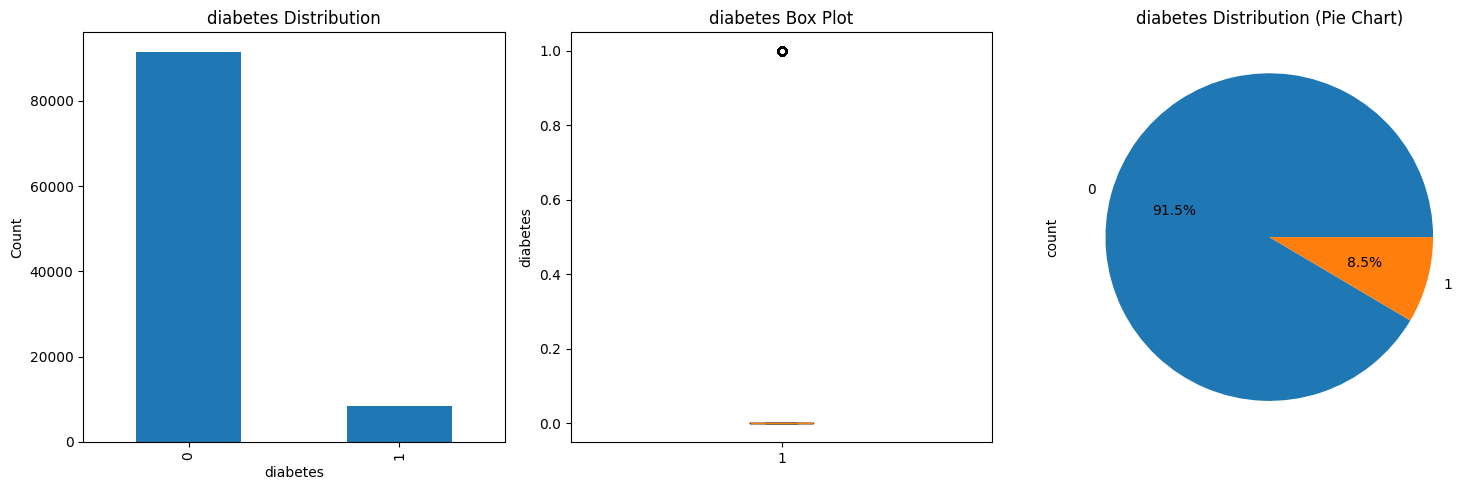


diabetes Statistics:
Value counts:
diabetes
0    91500
1     8500
Name: count, dtype: int64

Unique values: 2
Mean: 0.09
Median: 0.00
Min: 0.00
Max: 1.00


In [7]:
# If you know the exact target column name, replace 'YOUR_TARGET_COLUMN' with actual name
# For example: target_col = 'Outcome' or target_col = 'diabetes' etc.

# First, let's see all column names
print("All columns in your dataset:")
print(df.columns.tolist())

# Manually set your target column (replace with your actual target column name)
target_col = 'diabetes'  # Change this to your actual target column name

print(f"Using '{target_col}' as target variable")

# Target variable analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
if df[target_col].nunique() <= 10:  # Categorical or few unique values
    df[target_col].value_counts().plot(kind='bar')
    plt.title(f'{target_col} Distribution')
else:
    plt.hist(df[target_col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'{target_col} Distribution')
plt.xlabel(target_col)
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.boxplot(df[target_col])
plt.title(f'{target_col} Box Plot')
plt.ylabel(target_col)

plt.subplot(1, 3, 3)
df[target_col].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title(f'{target_col} Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

# Target statistics
print(f"\n{target_col} Statistics:")
print(f"Value counts:")
print(df[target_col].value_counts())
print(f"\nUnique values: {df[target_col].nunique()}")

if df[target_col].dtype in ['int64', 'float64']:
    print(f"Mean: {df[target_col].mean():.2f}")
    print(f"Median: {df[target_col].median():.2f}")
    print(f"Min: {df[target_col].min():.2f}")
    print(f"Max: {df[target_col].max():.2f}")

Numerical columns (13): ['year', 'age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']
Categorical columns (3): ['gender', 'location', 'smoking_history']


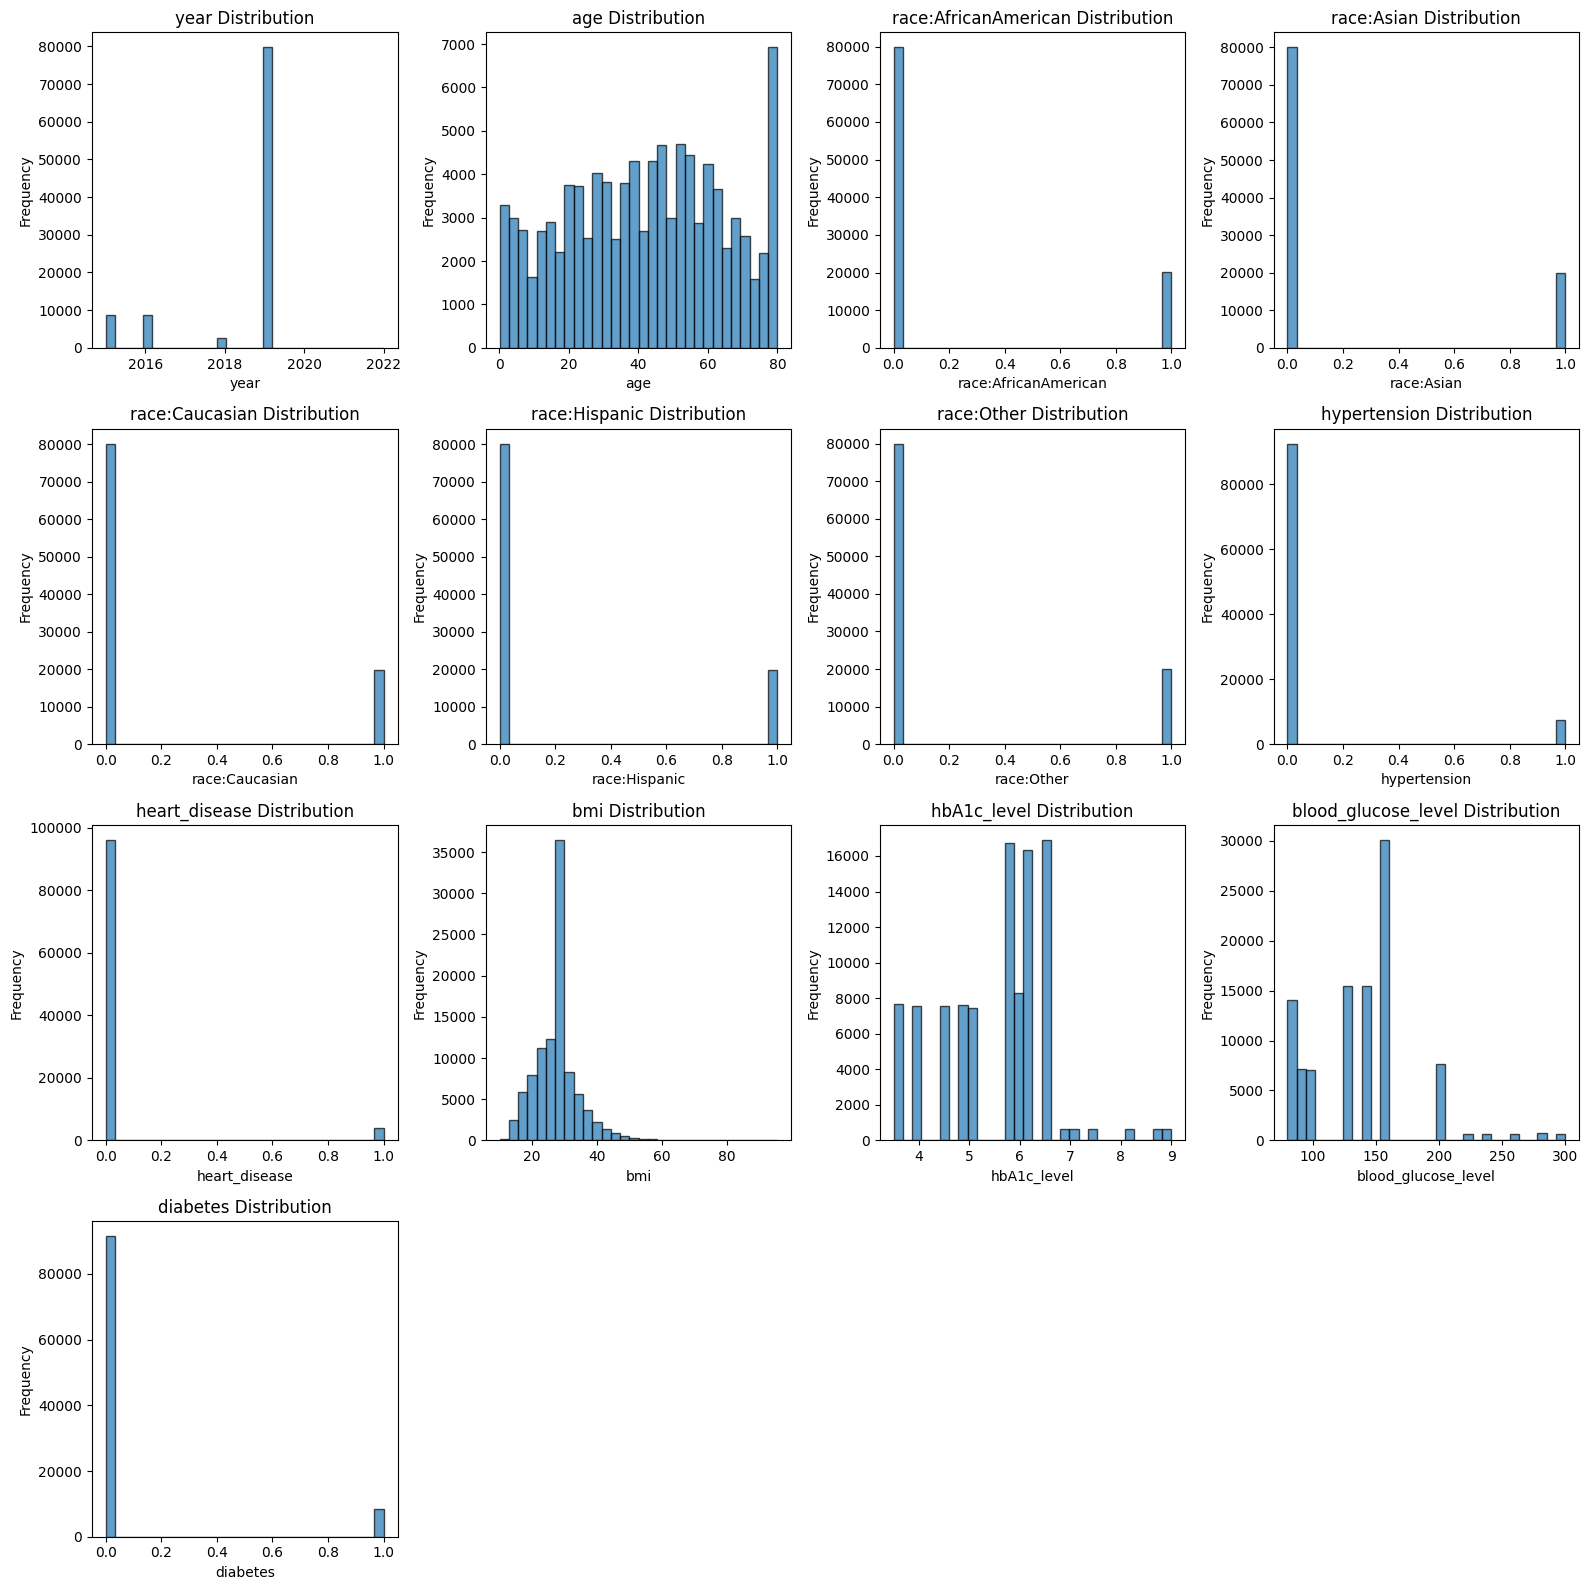

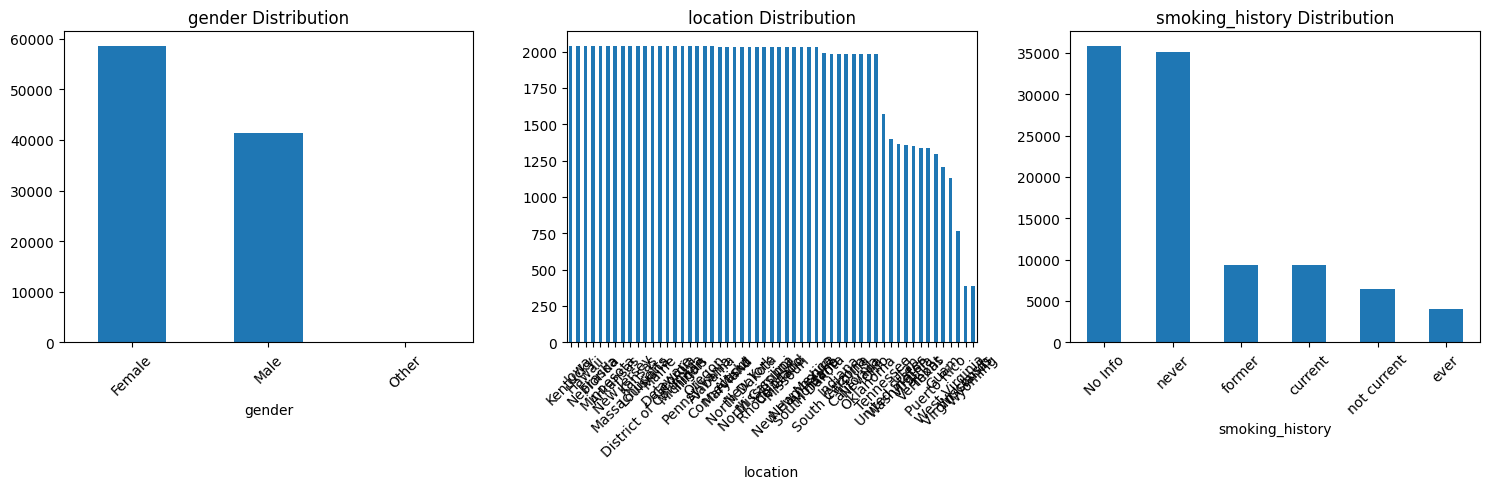

In [8]:
# Get numerical columns for distribution analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical columns ({len(numerical_cols)}): {list(numerical_cols)}")
print(f"Categorical columns ({len(categorical_cols)}): {list(categorical_cols)}")

# Distribution of numerical features
if len(numerical_cols) > 0:
    n_cols = min(4, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.ravel()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
            axes[i].set_title(f'{col} Distribution')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
    
    # Remove empty subplots
    for i in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

# Categorical features distribution
if len(categorical_cols) > 0:
    n_cols = min(3, len(categorical_cols))
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.ravel()
    
    for i, col in enumerate(categorical_cols):
        if i < len(axes):
            df[col].value_counts().plot(kind='bar', ax=axes[i])
            axes[i].set_title(f'{col} Distribution')
            axes[i].set_xlabel(col)
            axes[i].tick_params(axis='x', rotation=45)
    
    # Remove empty subplots
    for i in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

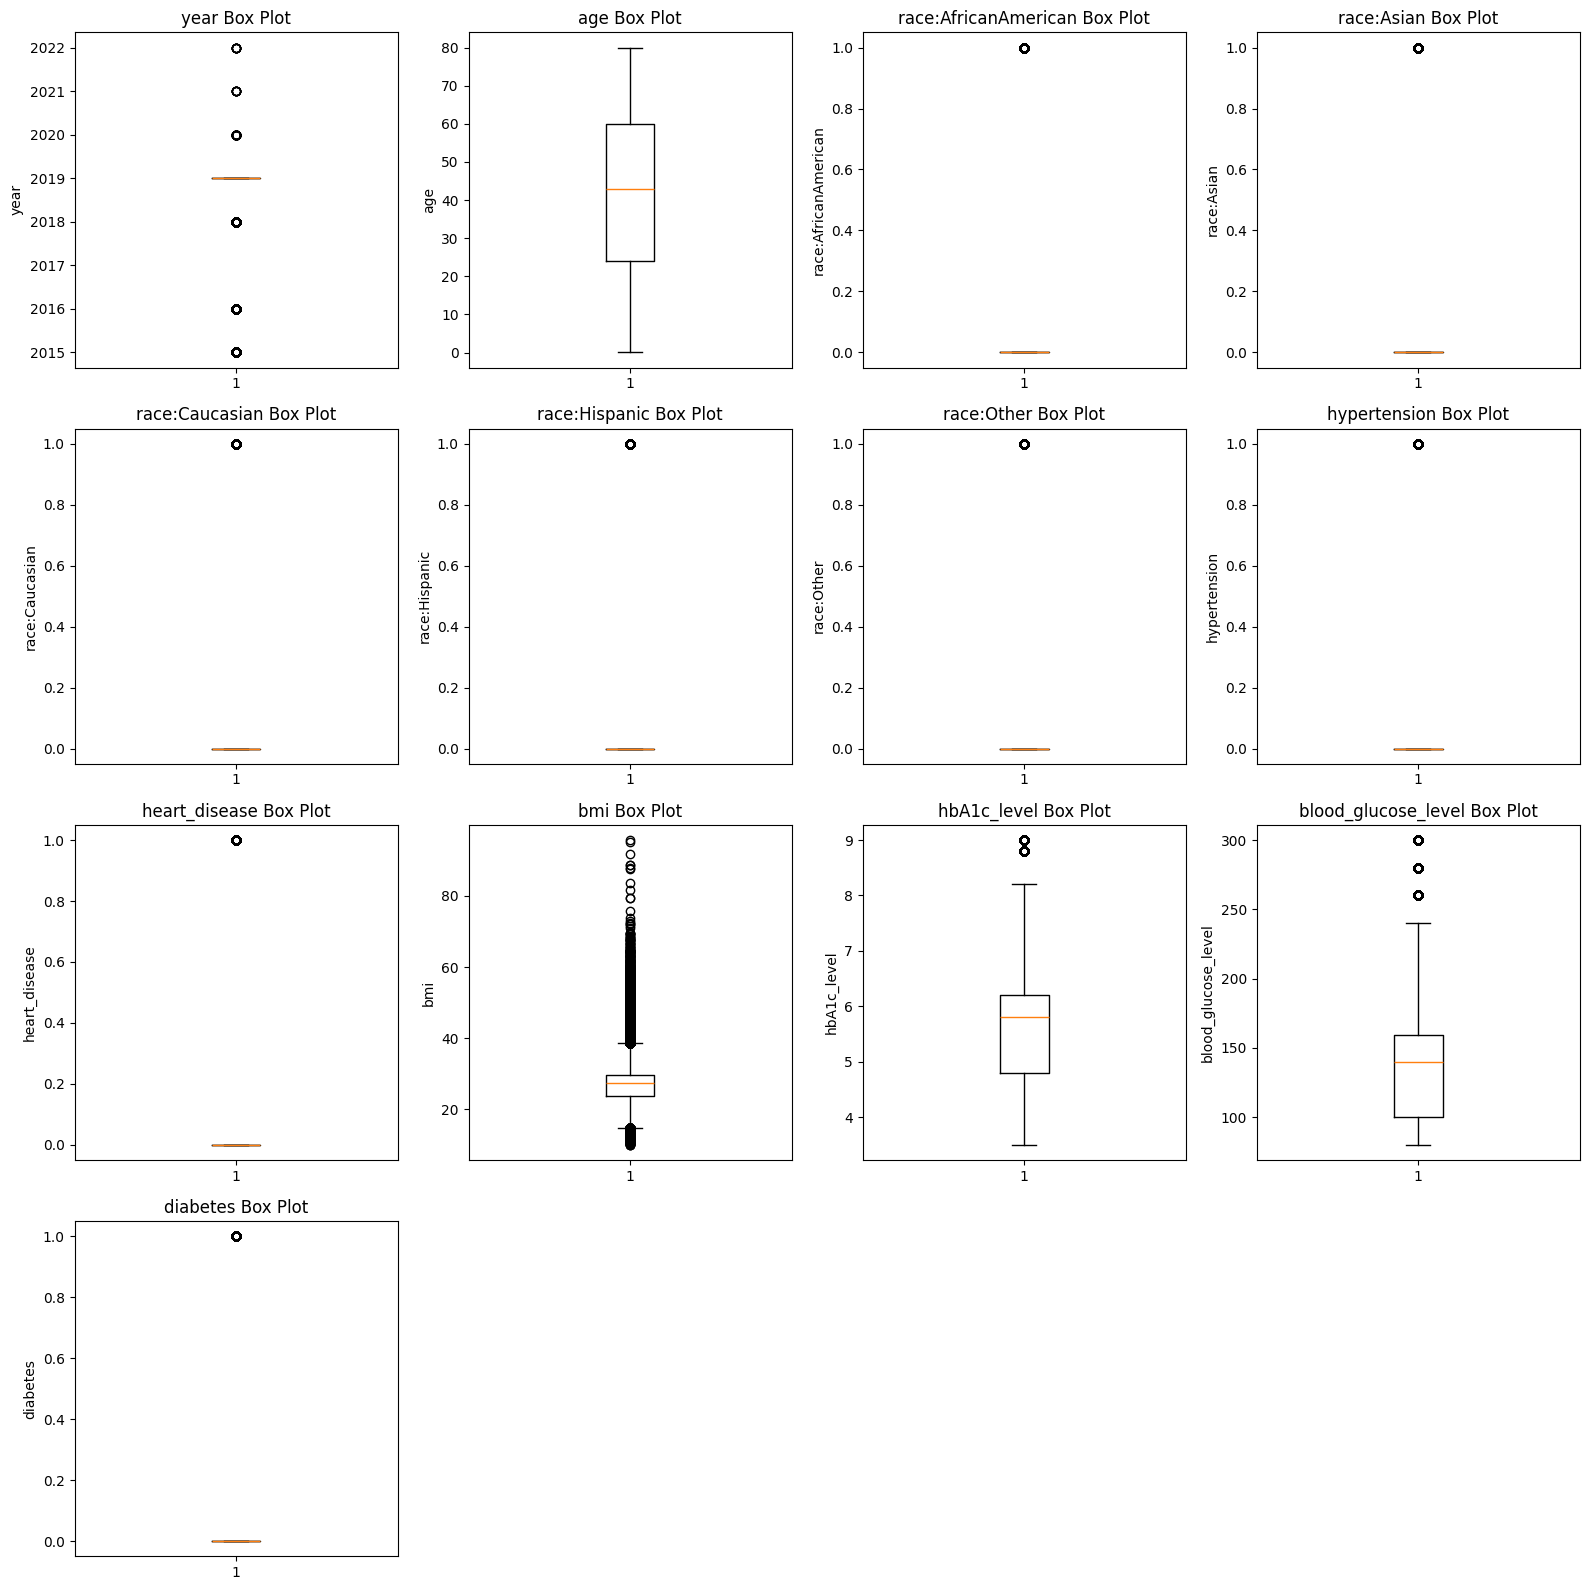

Outlier Analysis:
year: 20255 outliers (20.3%)
age: 0 outliers (0.0%)
race:AfricanAmerican: 20223 outliers (20.2%)
race:Asian: 20015 outliers (20.0%)
race:Caucasian: 19876 outliers (19.9%)
race:Hispanic: 19888 outliers (19.9%)
race:Other: 19998 outliers (20.0%)
hypertension: 7485 outliers (7.5%)
heart_disease: 3942 outliers (3.9%)
bmi: 7086 outliers (7.1%)
hbA1c_level: 1315 outliers (1.3%)
blood_glucose_level: 2038 outliers (2.0%)
diabetes: 8500 outliers (8.5%)


In [9]:
# Box plots for numerical features
if len(numerical_cols) > 0:
    n_cols = min(4, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(16, 4*n_rows))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        plt.boxplot(df[col])
        plt.title(f'{col} Box Plot')
        plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()

    # Outlier detection using IQR
    def detect_outliers(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers
    
    # Check outliers for each numerical feature
    print("Outlier Analysis:")
    for col in numerical_cols:
        outliers = detect_outliers(df, col)
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

Correlation Matrix:
                          year       age  race:AfricanAmerican  race:Asian  \
year                  1.000000 -0.003304             -0.004291   -0.007224   
age                  -0.003304  1.000000             -0.002183    0.003787   
race:AfricanAmerican -0.004291 -0.002183              1.000000   -0.251859   
race:Asian           -0.007224  0.003787             -0.251859    1.000000   
race:Caucasian        0.010587  0.003790             -0.250765   -0.249148   
race:Hispanic         0.004153  0.001962             -0.250860   -0.249241   
race:Other           -0.003172 -0.007336             -0.251725   -0.250102   
hypertension         -0.003806  0.251171             -0.001201    0.003977   
heart_disease         0.001820  0.233354             -0.000664    0.006166   
bmi                  -0.001861  0.337396             -0.001249    0.005240   
hbA1c_level          -0.000465  0.101354              0.001312   -0.000473   
blood_glucose_level   0.002968  0.110672    

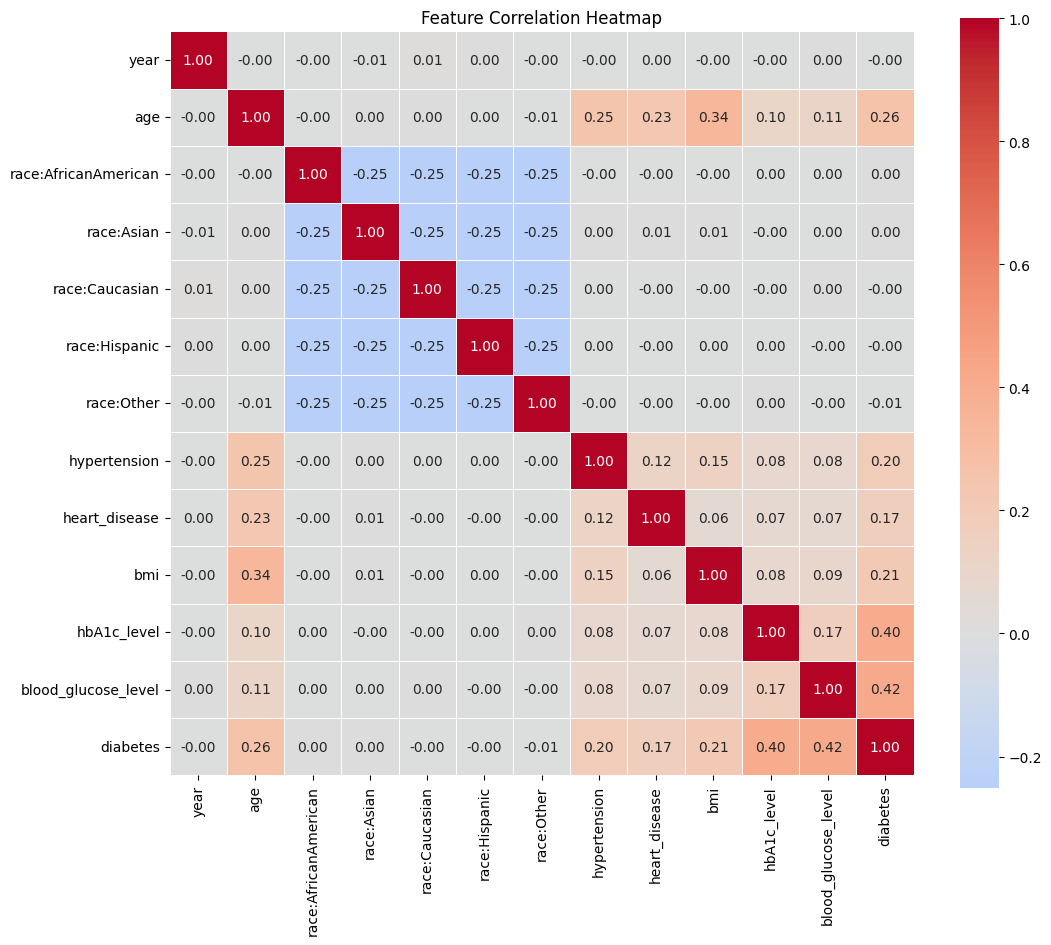


Correlation with diabetes:
diabetes                1.000000
blood_glucose_level     0.419558
hbA1c_level             0.400660
age                     0.258008
bmi                     0.214357
hypertension            0.197823
heart_disease           0.171727
race:AfricanAmerican    0.004378
race:Asian              0.003739
race:Hispanic          -0.001301
race:Caucasian         -0.001749
year                   -0.003464
race:Other             -0.005095
Name: diabetes, dtype: float64


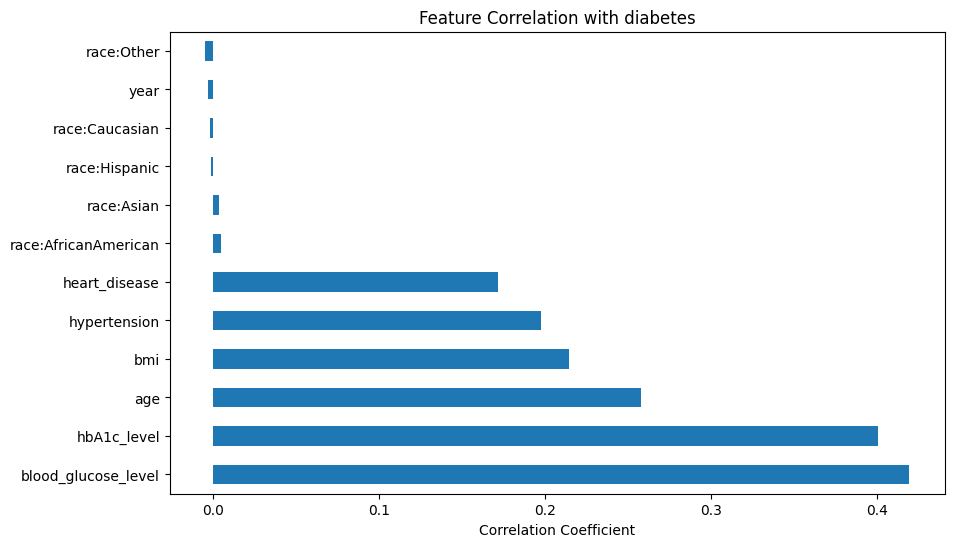

In [ ]:
# Correlation matrix for numerical columns
if len(numerical_cols) > 1:
    corr_matrix = df[numerical_cols].corr()
    print("Correlation Matrix:")
    print(corr_matrix)
    
    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, fmt='.2f')
    plt.title('Feature Correlation Heatmap')
    plt.show()
    
    # Correlation with target (if target is numerical)
    if target_col in numerical_cols:
        target_corr = df[numerical_cols].corr()[target_col].sort_values(ascending=False)
        print(f"\nCorrelation with {target_col}:")
        print(target_corr)
        
        # Visualize correlation with target
        plt.figure(figsize=(10, 6))
        target_corr.drop(target_col).plot(kind='barh')
        plt.title(f'Feature Correlation with {target_col}')
        plt.xlabel('Correlation Coefficient')
        plt.show()

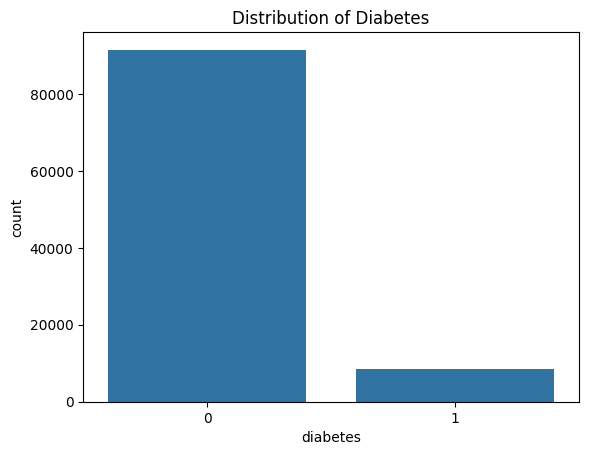

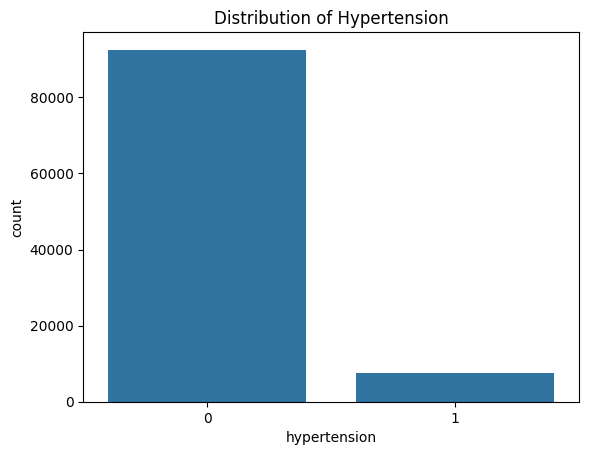

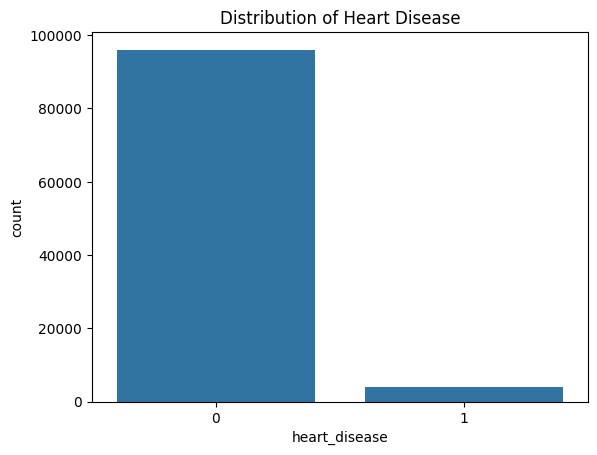

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='diabetes')
plt.title("Distribution of Diabetes")
plt.show()

sns.countplot(data=df, x='hypertension')
plt.title("Distribution of Hypertension")
plt.show()

sns.countplot(data=df, x='heart_disease')
plt.title("Distribution of Heart Disease")
plt.show()


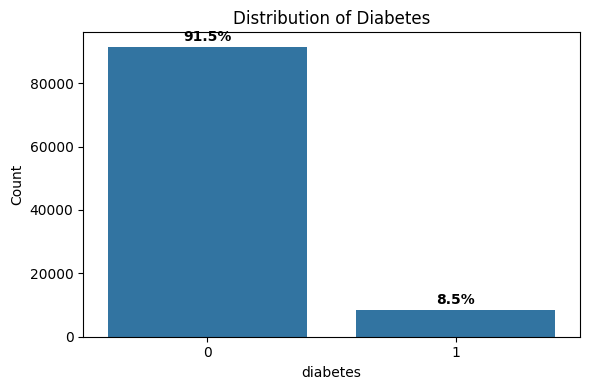

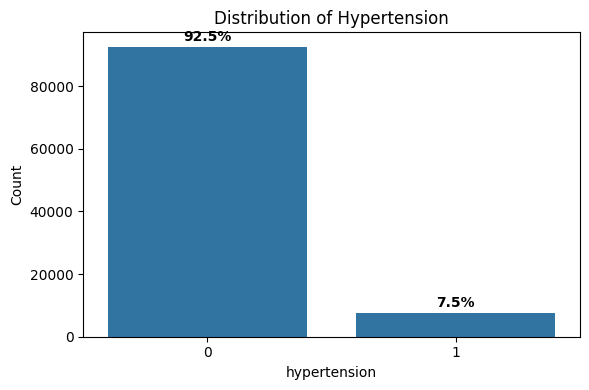

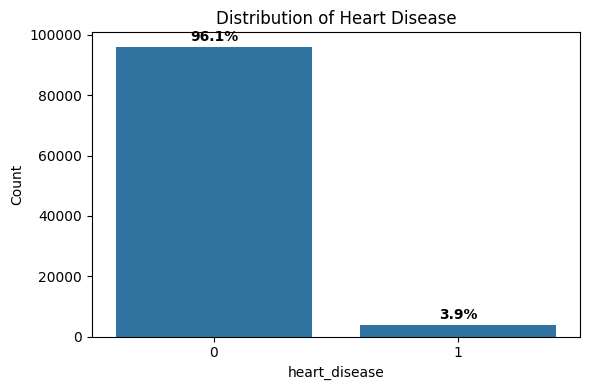

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def countplot_with_percent(df, column, title):
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data=df, x=column)

    total = len(df)

    for p in ax.patches:
        count = p.get_height()
        percent = 100 * count / total
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.text(
            x, y + total * 0.01,          # position slightly above bar
            f"{percent:.1f}%",
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

    plt.title(title)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


# --- Plots ---
countplot_with_percent(df, 'diabetes', "Distribution of Diabetes")
countplot_with_percent(df, 'hypertension', "Distribution of Hypertension")
countplot_with_percent(df, 'heart_disease', "Distribution of Heart Disease")


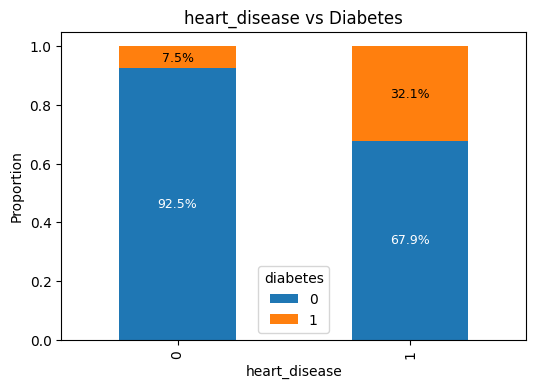

In [13]:
# Among those with Heart disease, how many have Diabetes?
import matplotlib.pyplot as plt
import pandas as pd

def plot_with_percentages(crosstab, title):
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(title)
    plt.ylabel("Proportion")

    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x, y = p.get_xy()
            # Automatically choose label color based on background
            label_color = "white" if p.get_facecolor()[0] < 0.5 else "black"

            ax.text(
                x + p.get_width() / 2,
                y + height / 2,
                f"{height*100:.1f}%",
                ha="center",
                va="center",
                fontsize=9,
                color=label_color
            )

    plt.show()


# --- Hypertension vs Diabetes ---
ct1 = pd.crosstab(df['heart_disease'], df['diabetes'], normalize='index')
plot_with_percentages(ct1, "heart_disease vs Diabetes")


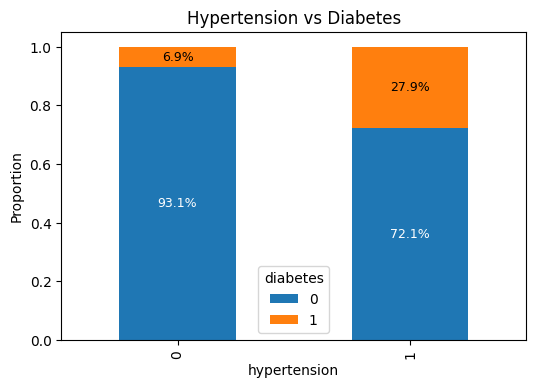

In [14]:
# Among those with Hypertension, how many have Diabetes?
import matplotlib.pyplot as plt
import pandas as pd

def plot_with_percentages(crosstab, title):
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(title)
    plt.ylabel("Proportion")

    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x, y = p.get_xy()
            # Automatically choose label color based on background
            label_color = "white" if p.get_facecolor()[0] < 0.5 else "black"

            ax.text(
                x + p.get_width() / 2,
                y + height / 2,
                f"{height*100:.1f}%",
                ha="center",
                va="center",
                fontsize=9,
                color=label_color
            )

    plt.show()


# --- Hypertension vs Diabetes ---
ct1 = pd.crosstab(df['hypertension'], df['diabetes'], normalize='index')
plot_with_percentages(ct1, "Hypertension vs Diabetes")



<Figure size 600x400 with 0 Axes>

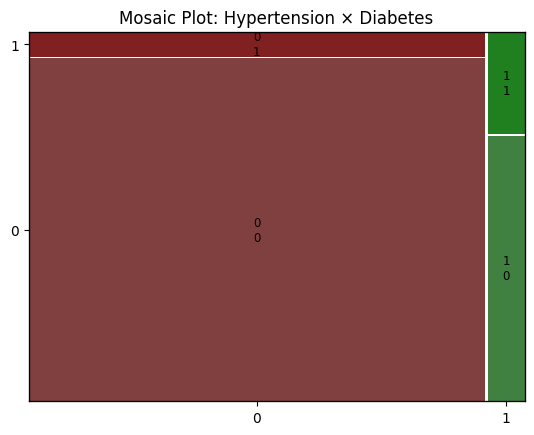

In [15]:
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
import matplotlib.pyplot as plt

# Prepare 2×2 contingency table
ct = pd.crosstab(df['hypertension'], df['diabetes'])

plt.figure(figsize=(6, 4))
mosaic(ct.stack(), title='Mosaic Plot: Hypertension × Diabetes')
plt.show()
#not so impressive. tried mosaic plot for the first time. 


In [16]:
# --- Step 1: Compute counts ---

only_diabetes = df[(df['diabetes'] == 1) &
                   (df['hypertension'] == 0) &
                   (df['heart_disease'] == 0)].shape[0]

diabetes_hypertension = df[(df['diabetes'] == 1) &
                           (df['hypertension'] == 1)].shape[0]

diabetes_heart = df[(df['diabetes'] == 1) &
                    (df['heart_disease'] == 1)].shape[0]

# --- Step 2: Create summary table ---

summary = pd.DataFrame({
    "only_diabetes": [only_diabetes],
    "diabetes_and_hypertension": [diabetes_hypertension],
    "diabetes_and_heart_disease": [diabetes_heart]
})

# --- Step 3: Display in Jupyter ---
summary


,only_diabetes,diabetes_and_hypertension,diabetes_and_heart_disease
0,5503,2088,1267


In [17]:
df['diabetes'].value_counts()


diabetes
0    91500
1     8500
Name: count, dtype: int64

In [18]:
only_diabetes = df[(df['diabetes']==1) & (df['hypertension']==0) & (df['heart_disease']==0)].shape[0]

diabetes_hypertension_only = df[(df['diabetes']==1) & (df['hypertension']==1) & (df['heart_disease']==0)].shape[0]

diabetes_heart_only = df[(df['diabetes']==1) & (df['hypertension']==0) & (df['heart_disease']==1)].shape[0]

all_three = df[(df['diabetes']==1) & (df['hypertension']==1) & (df['heart_disease']==1)].shape[0]

# Check total
total_diabetes = only_diabetes + diabetes_hypertension_only + diabetes_heart_only + all_three
total_diabetes


8500

In [19]:
all_three_count = df[(df['diabetes'] == 1) &
                     (df['hypertension'] == 1) &
                     (df['heart_disease'] == 1)].shape[0]

all_three_count


358

In [20]:
!pip install matplotlib-venn

<Figure size 800x600 with 0 Axes>

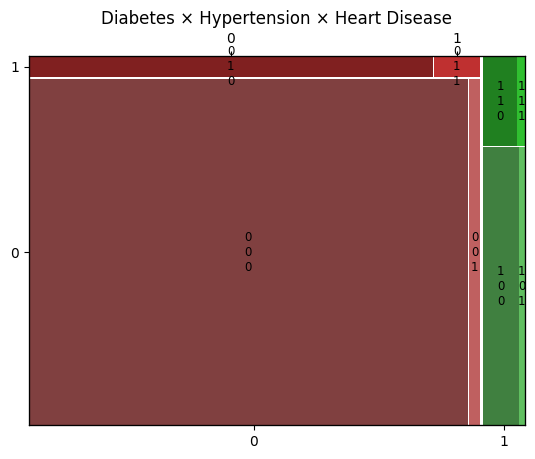

In [21]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas as pd

# Create a contingency table for all three variables
ct = pd.crosstab([df['diabetes'], df['hypertension']], df['heart_disease'])

# Plot the mosaic plot
plt.figure(figsize=(8,6))
mosaic(ct.stack(), title='Diabetes × Hypertension × Heart Disease')
plt.show()


In [22]:
# Count of people with all three conditions
all_three_count = df[(df['diabetes'] == 1) &
                     (df['hypertension'] == 1) &
                     (df['heart_disease'] == 1)].shape[0]

all_three_count


358

In [23]:
# Filter dataframe for people with diabetes
diabetes_df = df[df['diabetes'] == 1]

# Select relevant columns
diabetes_info = diabetes_df[['age', 'location', 'gender', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'hbA1c_level', 'hypertension', 'heart_disease', 'bmi', 'blood_glucose_level', 'smoking_history']]

# Display the first few rows
diabetes_info.head()


,age,location,gender,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hbA1c_level,hypertension,heart_disease,bmi,blood_glucose_level,smoking_history
14,64.0,Alabama,Female,0,0,0,0,1,8.2,0,0,49.27,140,ever
29,80.0,Alabama,Male,1,0,0,0,0,8.8,0,0,29.16,140,former
32,42.0,Alabama,Female,0,0,0,0,1,7.5,0,0,27.32,130,current
34,67.0,Alabama,Male,0,0,0,1,0,6.8,0,1,35.48,200,No Info
35,80.0,Alabama,Female,0,0,0,1,0,7.5,0,1,26.00,200,never


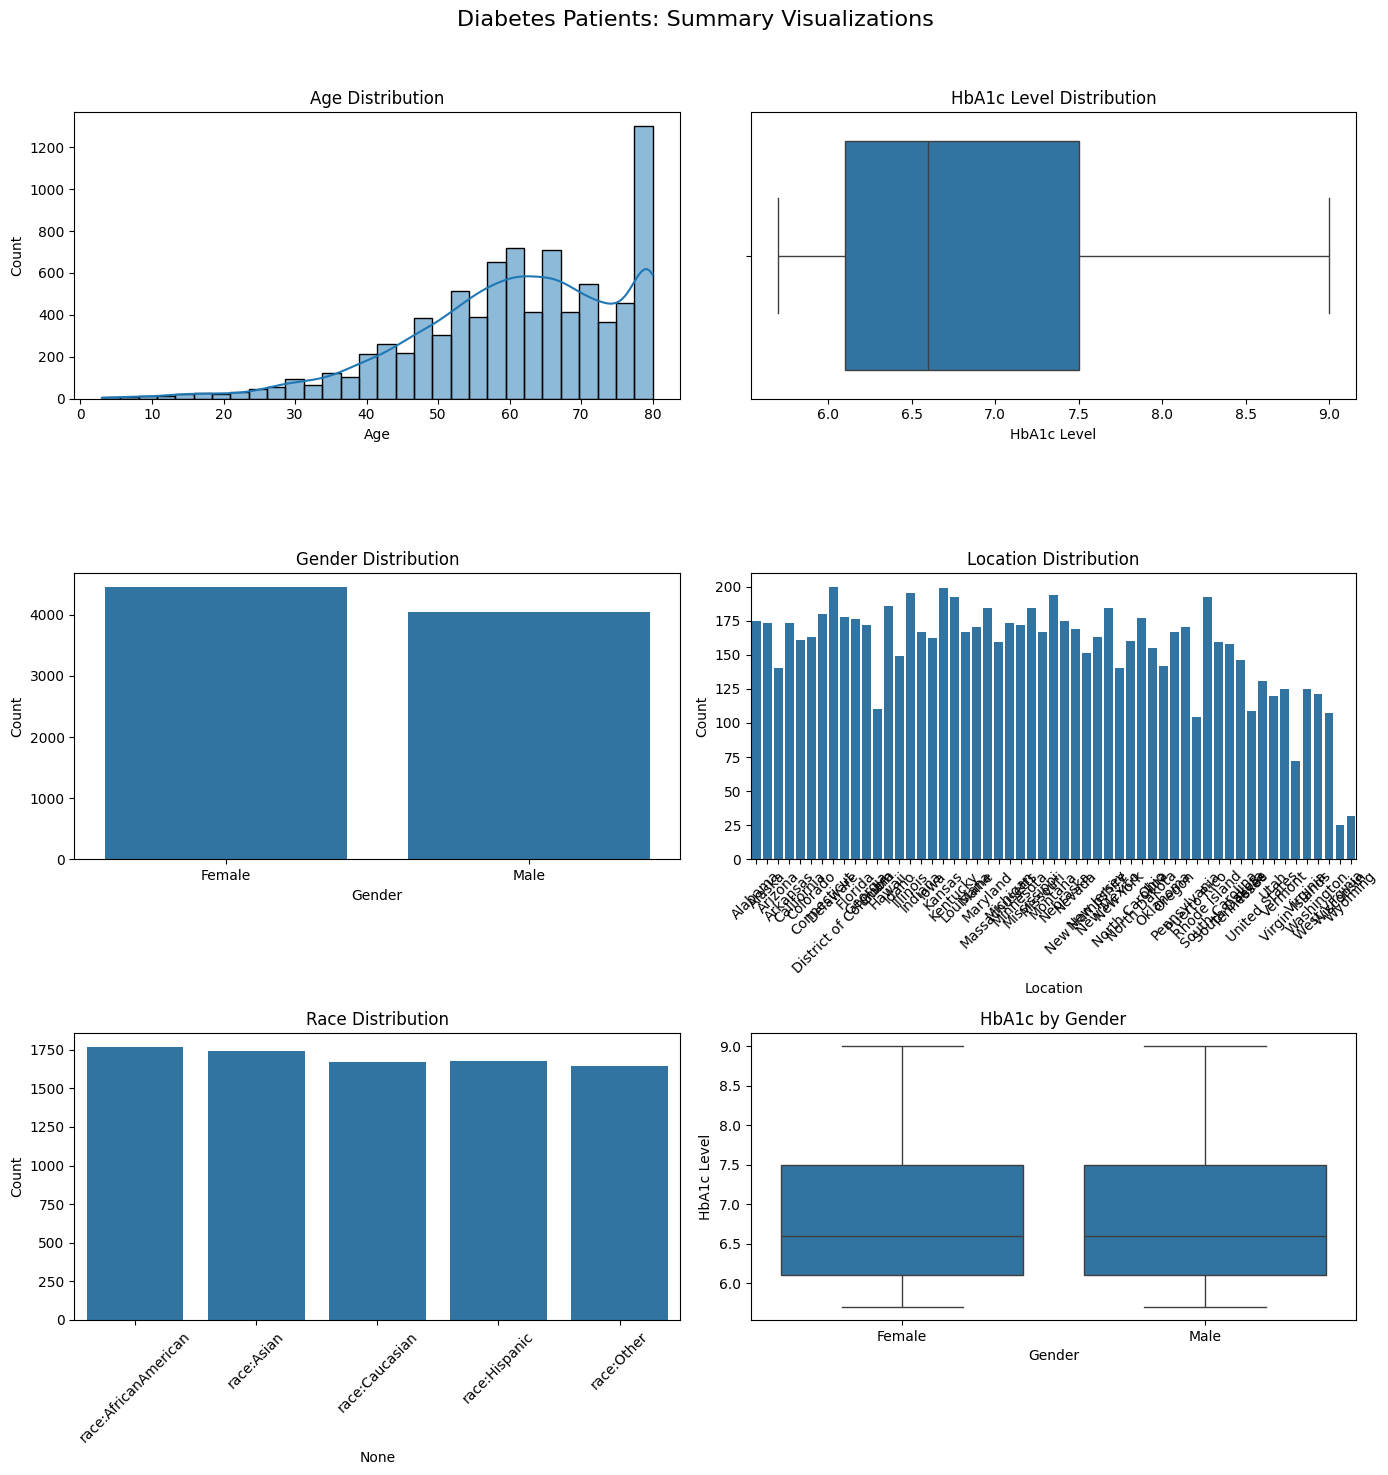

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(14, 15))
fig.suptitle('Diabetes Patients: Summary Visualizations', fontsize=16)

# --- Plot 1: Age distribution ---
sns.histplot(diabetes_df['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# --- Plot 2: HbA1c distribution ---
sns.boxplot(x=diabetes_df['hbA1c_level'], ax=axes[0, 1])
axes[0, 1].set_title('HbA1c Level Distribution')
axes[0, 1].set_xlabel('HbA1c Level')

# --- Plot 3: Gender counts ---
sns.countplot(data=diabetes_df, x='gender', ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')

# --- Plot 4: Location counts ---
sns.countplot(data=diabetes_df, x='location', ax=axes[1, 1])
axes[1, 1].set_title('Location Distribution')
axes[1, 1].set_xlabel('Location')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

# --- Plot 5: Race distribution ---
# Using simplified 'race_category' column; if not created, use one-hot sums instead
if 'race_category' in diabetes_df.columns:
    sns.countplot(data=diabetes_df, x='race_category', ax=axes[2, 0])
    axes[2, 0].set_title('Race Distribution')
    axes[2, 0].set_xlabel('Race')
    axes[2, 0].tick_params(axis='x', rotation=45)
else:
    race_counts = diabetes_df[['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']].sum()
    sns.barplot(x=race_counts.index, y=race_counts.values, ax=axes[2, 0])
    axes[2, 0].set_title('Race Distribution')
    axes[2, 0].set_ylabel('Count')
    axes[2, 0].tick_params(axis='x', rotation=45)

# --- Plot 6: HbA1c by Gender ---
sns.boxplot(data=diabetes_df, x='gender', y='hbA1c_level', ax=axes[2, 1])
axes[2, 1].set_title('HbA1c by Gender')
axes[2, 1].set_xlabel('Gender')
axes[2, 1].set_ylabel('HbA1c Level')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


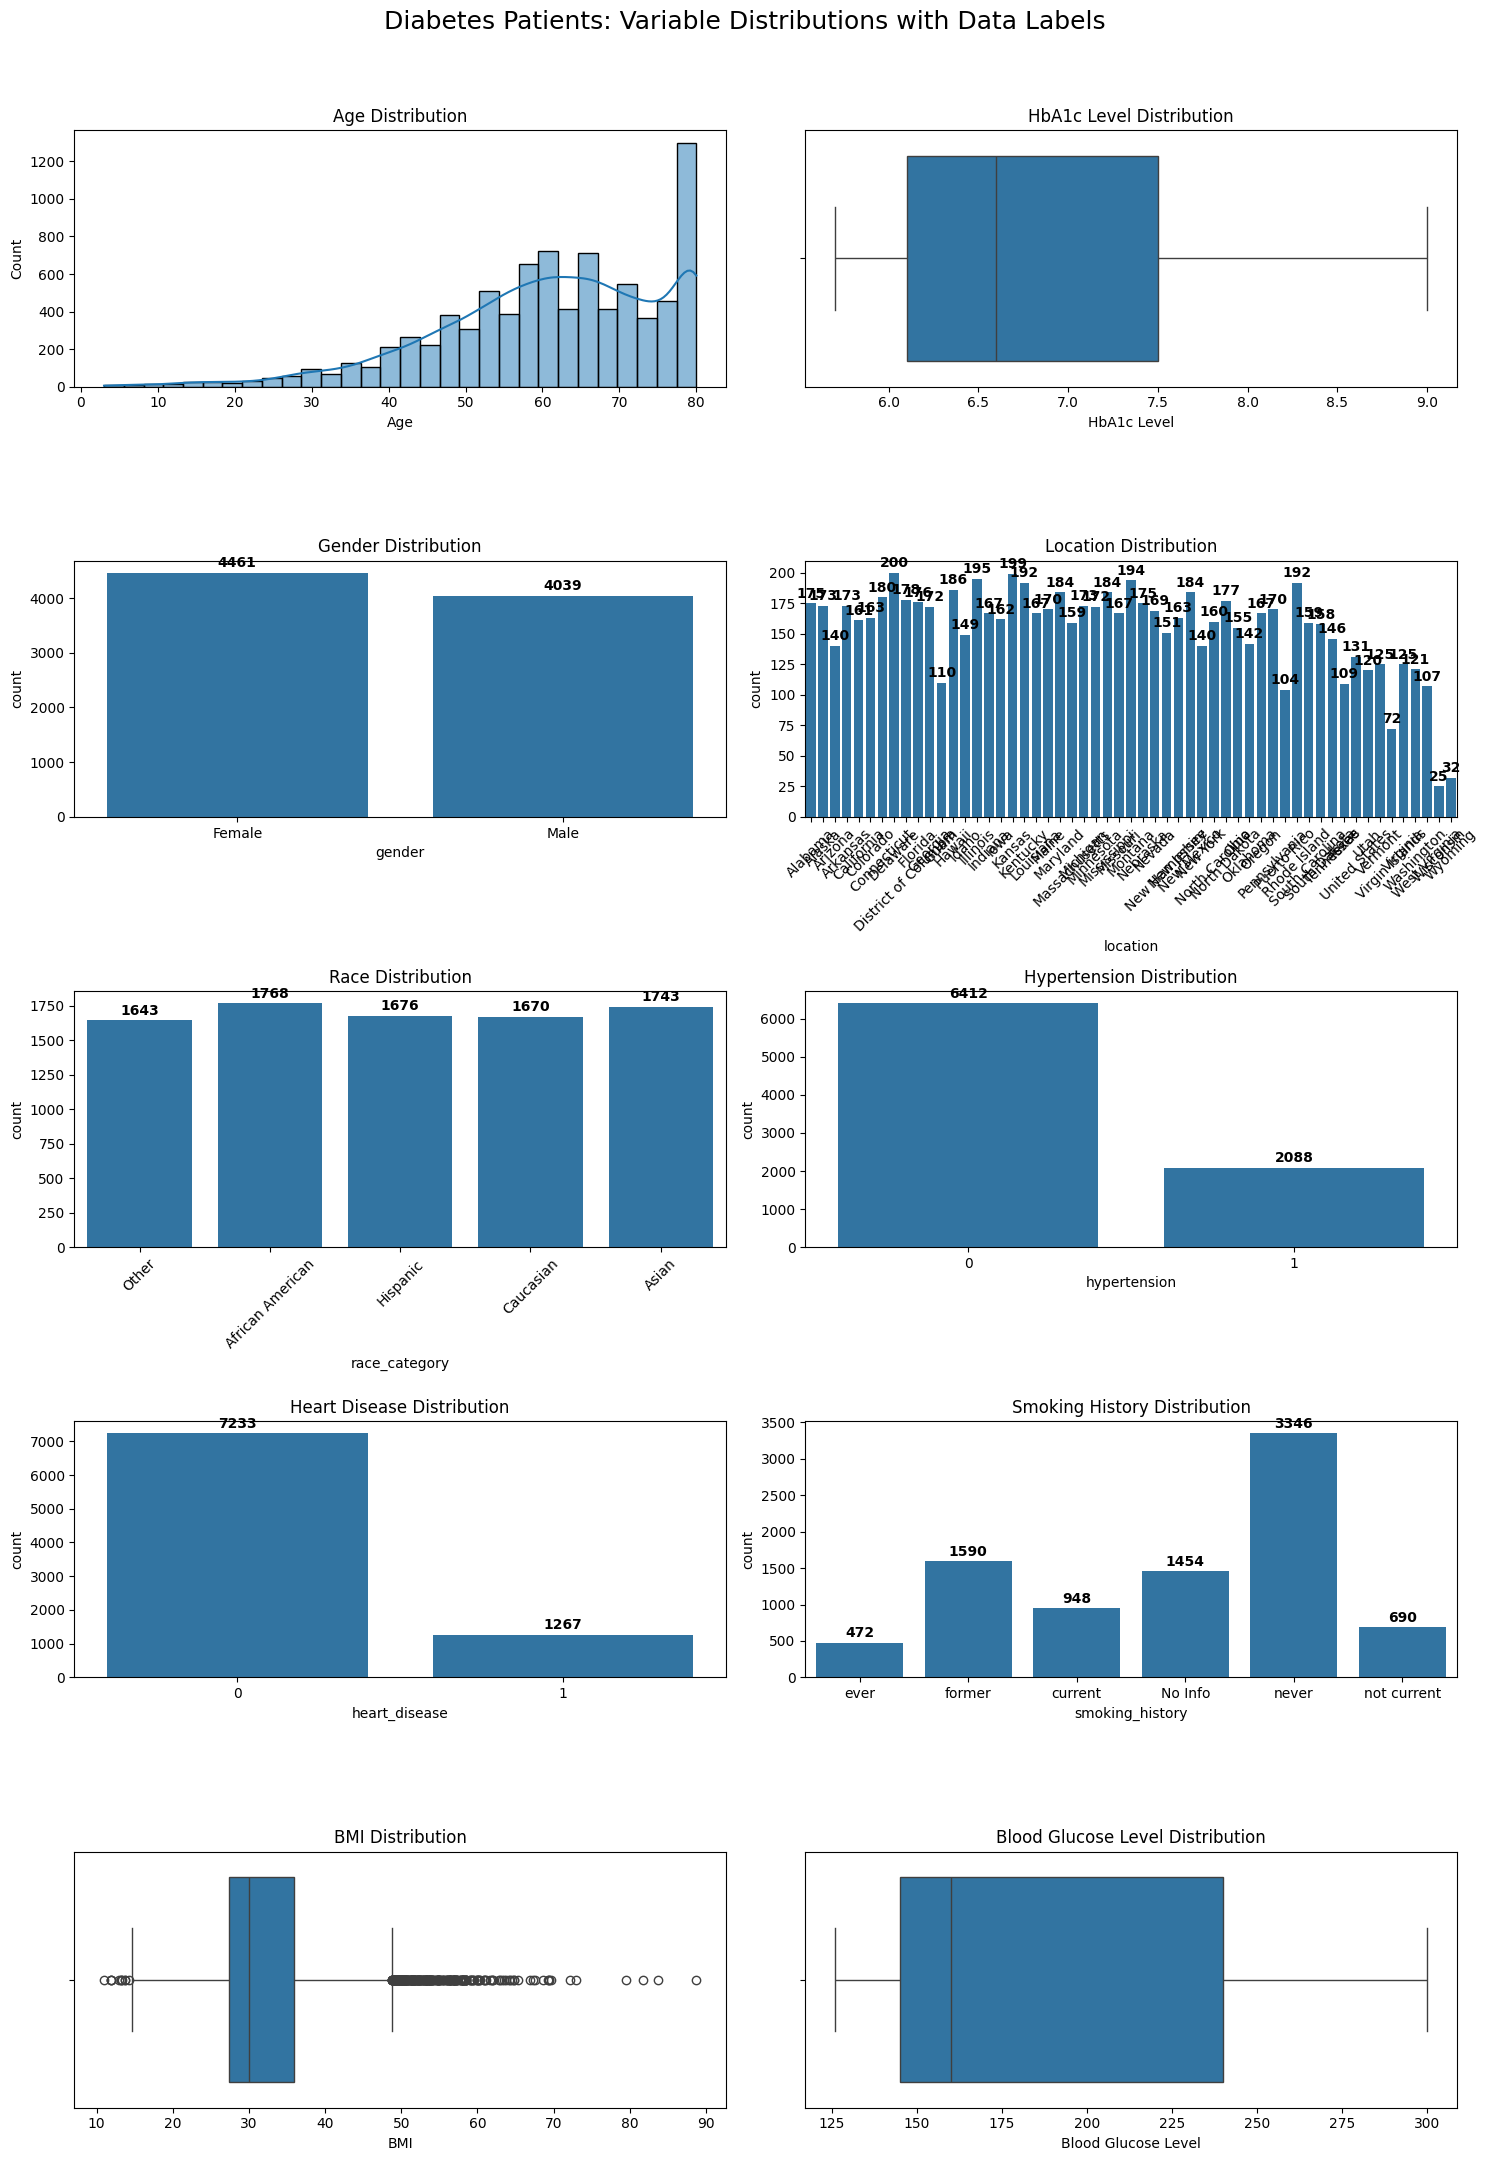

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter diabetes patients
diabetes_df = df[df['diabetes'] == 1]

# Prepare race column (if not already prepared)
if 'race_category' not in diabetes_df.columns:
    def get_race(row):
        if row['race:AfricanAmerican'] == 1:
            return 'African American'
        elif row['race:Asian'] == 1:
            return 'Asian'
        elif row['race:Caucasian'] == 1:
            return 'Caucasian'
        elif row['race:Hispanic'] == 1:
            return 'Hispanic'
        elif row['race:Other'] == 1:
            return 'Other'
        else:
            return 'Unknown'
    diabetes_df['race_category'] = diabetes_df.apply(get_race, axis=1)

# Variables to plot:
# Numerical: age, hbA1c_level, bmi, blood_glucose_level, year
# Categorical: gender, location, race_category, hypertension, heart_disease, smoking_history

fig, axes = plt.subplots(5, 2, figsize=(15, 22))
fig.suptitle('Diabetes Patients: Variable Distributions with Data Labels', fontsize=18)

# Helper to add data labels on countplots
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2,
                height + max(ax.get_ylim())*0.01,
                f'{int(height)}',
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='bold'
            )

# 1. Age distribution (histogram)
sns.histplot(diabetes_df['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# 2. HbA1c distribution (boxplot)
sns.boxplot(x=diabetes_df['hbA1c_level'], ax=axes[0, 1])
axes[0, 1].set_title('HbA1c Level Distribution')
axes[0, 1].set_xlabel('HbA1c Level')

# 3. Gender countplot + labels
sns.countplot(data=diabetes_df, x='gender', ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')
add_labels(axes[1, 0])

# 4. Location countplot + labels
sns.countplot(data=diabetes_df, x='location', ax=axes[1, 1])
axes[1, 1].set_title('Location Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)
add_labels(axes[1, 1])

# 5. Race countplot + labels
sns.countplot(data=diabetes_df, x='race_category', ax=axes[2, 0])
axes[2, 0].set_title('Race Distribution')
axes[2, 0].tick_params(axis='x', rotation=45)
add_labels(axes[2, 0])

# 6. Hypertension countplot + labels
sns.countplot(data=diabetes_df, x='hypertension', ax=axes[2, 1])
axes[2, 1].set_title('Hypertension Distribution')
add_labels(axes[2, 1])

# 7. Heart Disease countplot + labels
sns.countplot(data=diabetes_df, x='heart_disease', ax=axes[3, 0])
axes[3, 0].set_title('Heart Disease Distribution')
add_labels(axes[3, 0])

# 8. Smoking History countplot + labels
sns.countplot(data=diabetes_df, x='smoking_history', ax=axes[3, 1])
axes[3, 1].set_title('Smoking History Distribution')
add_labels(axes[3, 1])

# 9. BMI distribution (boxplot)
sns.boxplot(x=diabetes_df['bmi'], ax=axes[4, 0])
axes[4, 0].set_title('BMI Distribution')
axes[4, 0].set_xlabel('BMI')

# 10. Blood Glucose Level distribution (boxplot)
sns.boxplot(x=diabetes_df['blood_glucose_level'], ax=axes[4, 1])
axes[4, 1].set_title('Blood Glucose Level Distribution')
axes[4, 1].set_xlabel('Blood Glucose Level')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [26]:
# Total diabetes patients
total_diabetes = df[df['diabetes'] == 1].shape[0]
print(f"Total diabetes patients: {total_diabetes}")

# List of categorical columns to check
categorical_cols = ['gender', 'location', 'race_category', 'hypertension', 'heart_disease', 'smoking_history']

# If 'race_category' does not exist, create it as before
if 'race_category' not in df.columns:
    def get_race(row):
        if row['race:AfricanAmerican'] == 1:
            return 'African American'
        elif row['race:Asian'] == 1:
            return 'Asian'
        elif row['race:Caucasian'] == 1:
            return 'Caucasian'
        elif row['race:Hispanic'] == 1:
            return 'Hispanic'
        elif row['race:Other'] == 1:
            return 'Other'
        else:
            return 'Unknown'
    df['race_category'] = df.apply(get_race, axis=1)

diabetes_df = df[df['diabetes'] == 1]

# Check sum of counts for each categorical column
for col in categorical_cols:
    counts_sum = diabetes_df[col].value_counts().sum()
    print(f"Sum of counts in '{col}': {counts_sum} (Difference from total: {total_diabetes - counts_sum})")


Total diabetes patients: 8500
Sum of counts in 'gender': 8500 (Difference from total: 0)
Sum of counts in 'location': 8500 (Difference from total: 0)
Sum of counts in 'race_category': 8500 (Difference from total: 0)
Sum of counts in 'hypertension': 8500 (Difference from total: 0)
Sum of counts in 'heart_disease': 8500 (Difference from total: 0)
Sum of counts in 'smoking_history': 8500 (Difference from total: 0)


=== Numerical Variables Summary ===

age summary:
count    8500.000000
mean       60.946588
std        14.549880
min         3.000000
25%        52.000000
50%        62.000000
75%        72.000000
max        80.000000
Name: age, dtype: float64
Skewness: -0.76
Kurtosis: 0.47
----------------------------------------


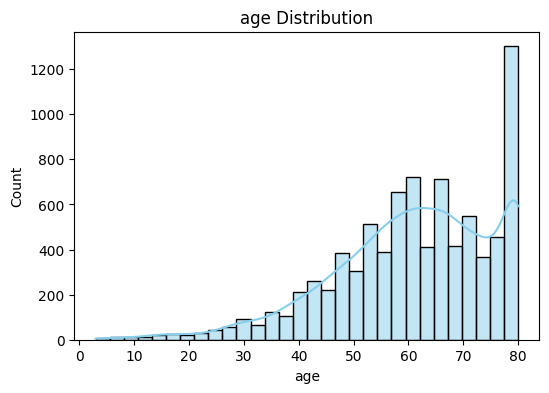

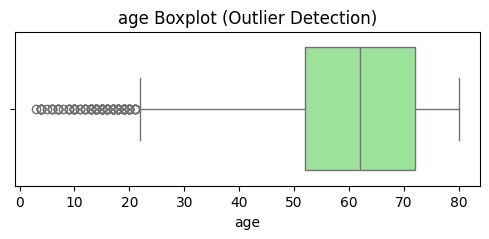

hbA1c_level summary:
count    8500.000000
mean        6.934953
std         1.076562
min         5.700000
25%         6.100000
50%         6.600000
75%         7.500000
max         9.000000
Name: hbA1c_level, dtype: float64
Skewness: 0.75
Kurtosis: -0.77
----------------------------------------


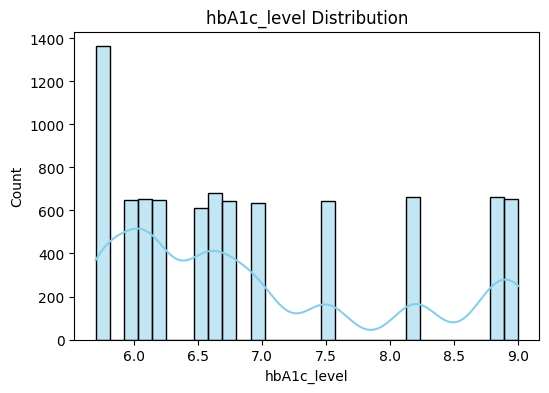

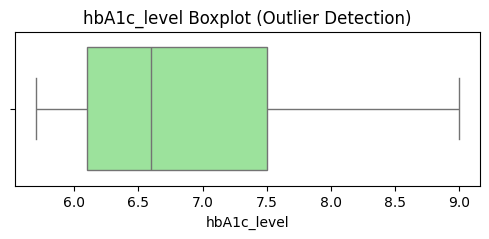

bmi summary:
count    8500.000000
mean       31.988382
std         7.558371
min        10.980000
25%        27.320000
50%        29.970000
75%        35.912500
max        88.720000
Name: bmi, dtype: float64
Skewness: 1.26
Kurtosis: 2.74
----------------------------------------


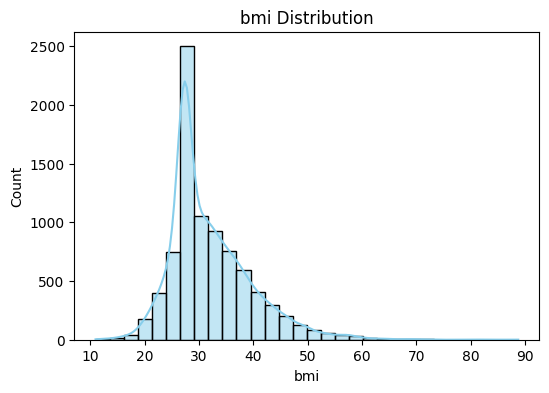

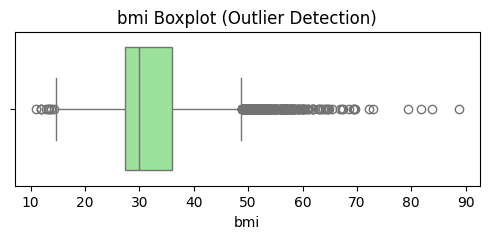

blood_glucose_level summary:
count    8500.000000
mean      194.094706
std        58.641111
min       126.000000
25%       145.000000
50%       160.000000
75%       240.000000
max       300.000000
Name: blood_glucose_level, dtype: float64
Skewness: 0.50
Kurtosis: -1.23
----------------------------------------


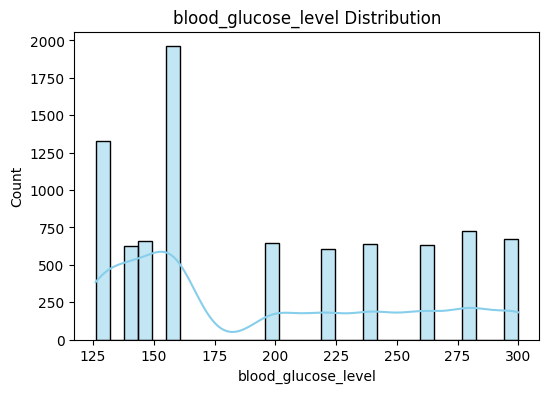

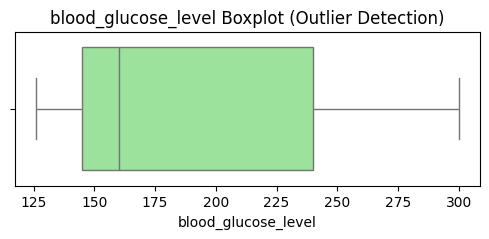

year summary:
count    8500.000000
mean     2018.345529
std         1.357247
min      2015.000000
25%      2019.000000
50%      2019.000000
75%      2019.000000
max      2022.000000
Name: year, dtype: float64
Skewness: -1.71
Kurtosis: 1.16
----------------------------------------


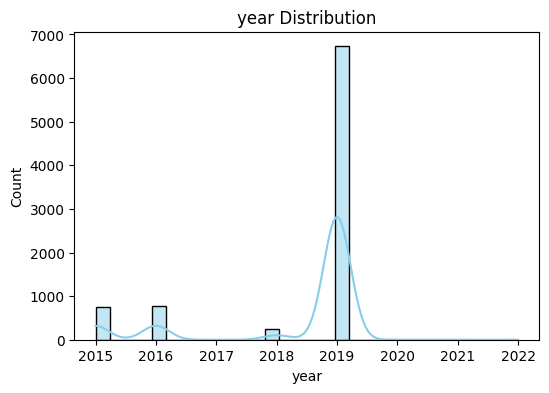

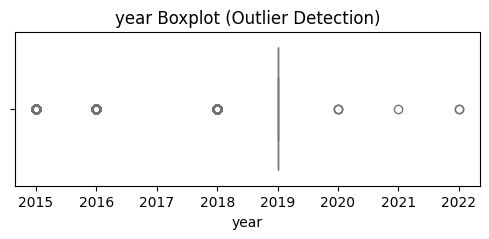


=== Categorical Variables Summary ===

gender value counts:
gender
Female    4461
Male      4039
Name: count, dtype: int64
Percentages:
gender
Female    52.48
Male      47.52
Name: count, dtype: float64%
----------------------------------------


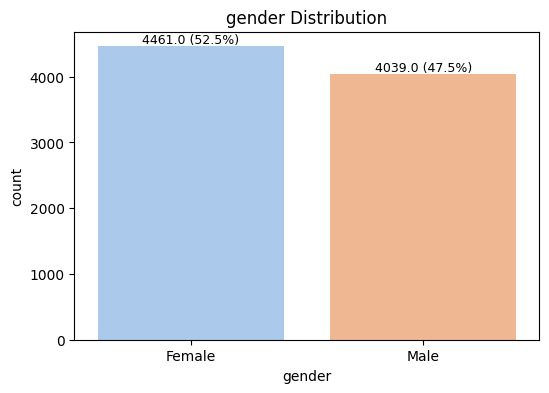

location value counts:
location
Delaware                200
Kansas                  199
Illinois                195
Montana                 194
Kentucky                192
Rhode Island            192
Hawaii                  186
Mississippi             184
New Mexico              184
Maryland                184
Connecticut             180
District of Columbia    178
North Dakota            177
Florida                 176
Alabama                 175
Nebraska                175
Michigan                173
Arkansas                173
Alaska                  173
Minnesota               172
Georgia                 172
Maine                   170
Pennsylvania            170
Nevada                  169
Louisiana               167
Oregon                  167
Missouri                167
Indiana                 167
New Jersey              163
Colorado                163
Iowa                    162
California              161
North Carolina          160
South Carolina          159
Massachusetts   

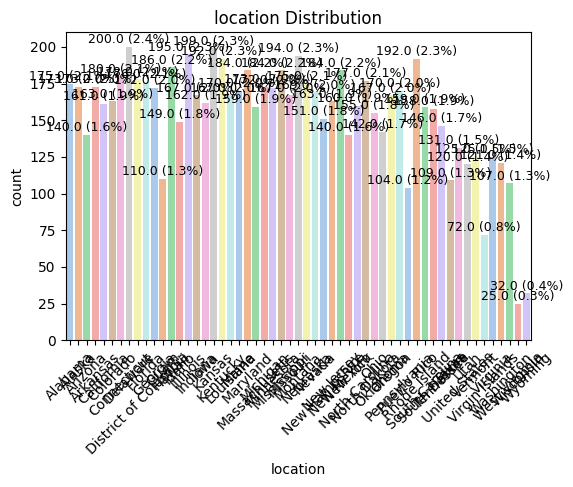

race_category value counts:
race_category
African American    1768
Asian               1743
Hispanic            1676
Caucasian           1670
Other               1643
Name: count, dtype: int64
Percentages:
race_category
African American    20.80
Asian               20.51
Hispanic            19.72
Caucasian           19.65
Other               19.33
Name: count, dtype: float64%
----------------------------------------


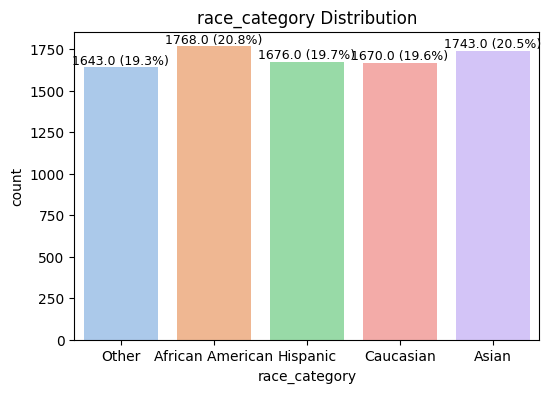

hypertension value counts:
hypertension
0    6412
1    2088
Name: count, dtype: int64
Percentages:
hypertension
0    75.44
1    24.56
Name: count, dtype: float64%
----------------------------------------


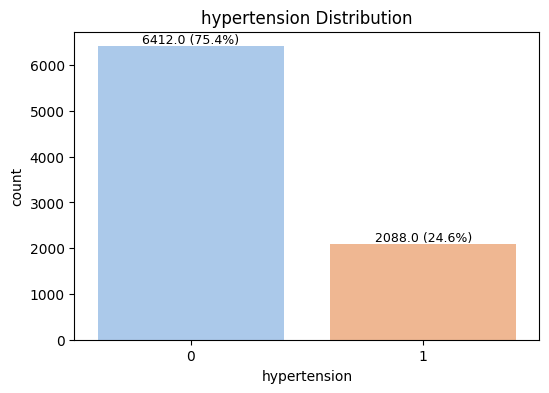

heart_disease value counts:
heart_disease
0    7233
1    1267
Name: count, dtype: int64
Percentages:
heart_disease
0    85.09
1    14.91
Name: count, dtype: float64%
----------------------------------------


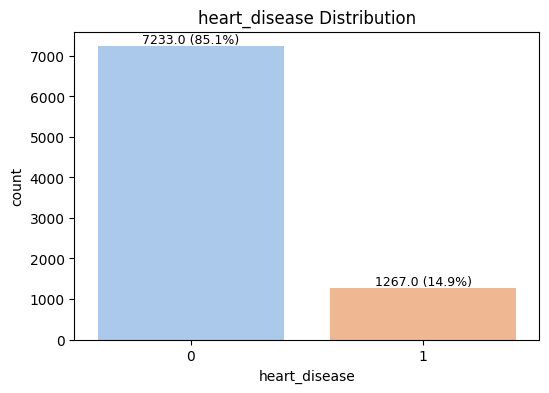

smoking_history value counts:
smoking_history
never          3346
former         1590
No Info        1454
current         948
not current     690
ever            472
Name: count, dtype: int64
Percentages:
smoking_history
never          39.36
former         18.71
No Info        17.11
current        11.15
not current     8.12
ever            5.55
Name: count, dtype: float64%
----------------------------------------


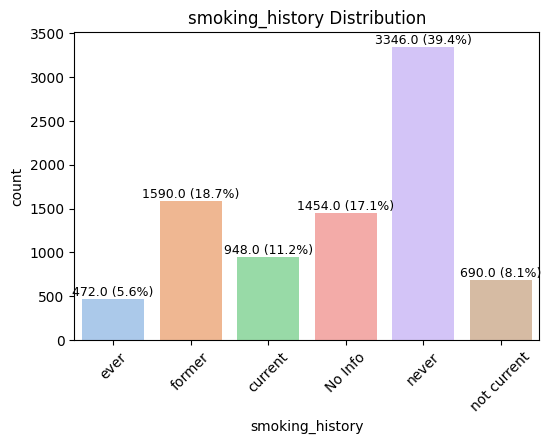

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter for diabetes patients if you want separate analysis
diabetes_df = df[df['diabetes'] == 1]

# List of numerical and categorical variables
numerical_cols = ['age', 'hbA1c_level', 'bmi', 'blood_glucose_level', 'year']
categorical_cols = ['gender', 'location', 'race_category', 'hypertension', 'heart_disease', 'smoking_history']

# ---- NUMERICAL VARIABLES ----
print("=== Numerical Variables Summary ===\n")
for col in numerical_cols:
    print(f"{col} summary:")
    print(diabetes_df[col].describe())
    print(f"Skewness: {diabetes_df[col].skew():.2f}")
    print(f"Kurtosis: {diabetes_df[col].kurtosis():.2f}")
    print("-"*40)

    # Plot distribution
    plt.figure(figsize=(6,4))
    sns.histplot(diabetes_df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
    # Boxplot to detect outliers
    plt.figure(figsize=(6,2))
    sns.boxplot(x=diabetes_df[col], color='lightgreen')
    plt.title(f'{col} Boxplot (Outlier Detection)')
    plt.show()

# ---- CATEGORICAL VARIABLES ----
print("\n=== Categorical Variables Summary ===\n")
for col in categorical_cols:
    print(f"{col} value counts:")
    counts = diabetes_df[col].value_counts(dropna=False)
    print(counts)
    print(f"Percentages:\n{(counts/len(diabetes_df)*100).round(2)}%")
    print("-"*40)
    
    # Countplot with data labels
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data=diabetes_df, x=col, palette='pastel')
    plt.title(f'{col} Distribution')
    
    # Add data labels on bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 0.5, f'{height} ({height/len(diabetes_df)*100:.1f}%)', 
                ha='center', va='bottom', fontsize=9)
    
    # Rotate x-axis labels if needed
    if diabetes_df[col].nunique() > 5:
        plt.xticks(rotation=45)
    plt.show()


In [28]:
# creating a diabetes profile 

In [29]:
# Filter diabetes patients
diabetes_df = df[df['diabetes'] == 1]
total = diabetes_df.shape[0]
print(f"Total diabetes patients: {total}")



Total diabetes patients: 8500


In [30]:
numerical_cols = ['age', 'hbA1c_level', 'bmi', 'blood_glucose_level', 'year']

profile_num = diabetes_df[numerical_cols].describe().T[['mean','50%','std','min','max']]
profile_num.rename(columns={'50%':'median'}, inplace=True)
print("=== Numerical Summary ===")
print(profile_num)


=== Numerical Summary ===
                            mean   median        std      min      max
age                    60.946588    62.00  14.549880     3.00    80.00
hbA1c_level             6.934953     6.60   1.076562     5.70     9.00
bmi                    31.988382    29.97   7.558371    10.98    88.72
blood_glucose_level   194.094706   160.00  58.641111   126.00   300.00
year                 2018.345529  2019.00   1.357247  2015.00  2022.00


In [31]:
categorical_cols = ['gender', 'race_category', 'location', 'hypertension', 'heart_disease', 'smoking_history']

print("\n=== Categorical Summary ===")
for col in categorical_cols:
    counts = diabetes_df[col].value_counts()
    percents = (counts / total * 100).round(1)
    summary_df = pd.DataFrame({'Count': counts, 'Percent': percents})
    print(f"\n{col}:\n{summary_df}")



=== Categorical Summary ===

gender:
        Count  Percent
gender                
Female   4461     52.5
Male     4039     47.5

race_category:
                  Count  Percent
race_category                   
African American   1768     20.8
Asian              1743     20.5
Hispanic           1676     19.7
Caucasian          1670     19.6
Other              1643     19.3

location:
                      Count  Percent
location                            
Delaware                200      2.4
Kansas                  199      2.3
Illinois                195      2.3
Montana                 194      2.3
Kentucky                192      2.3
Rhode Island            192      2.3
Hawaii                  186      2.2
Mississippi             184      2.2
New Mexico              184      2.2
Maryland                184      2.2
Connecticut             180      2.1
District of Columbia    178      2.1
North Dakota            177      2.1
Florida                 176      2.1
Alabama             

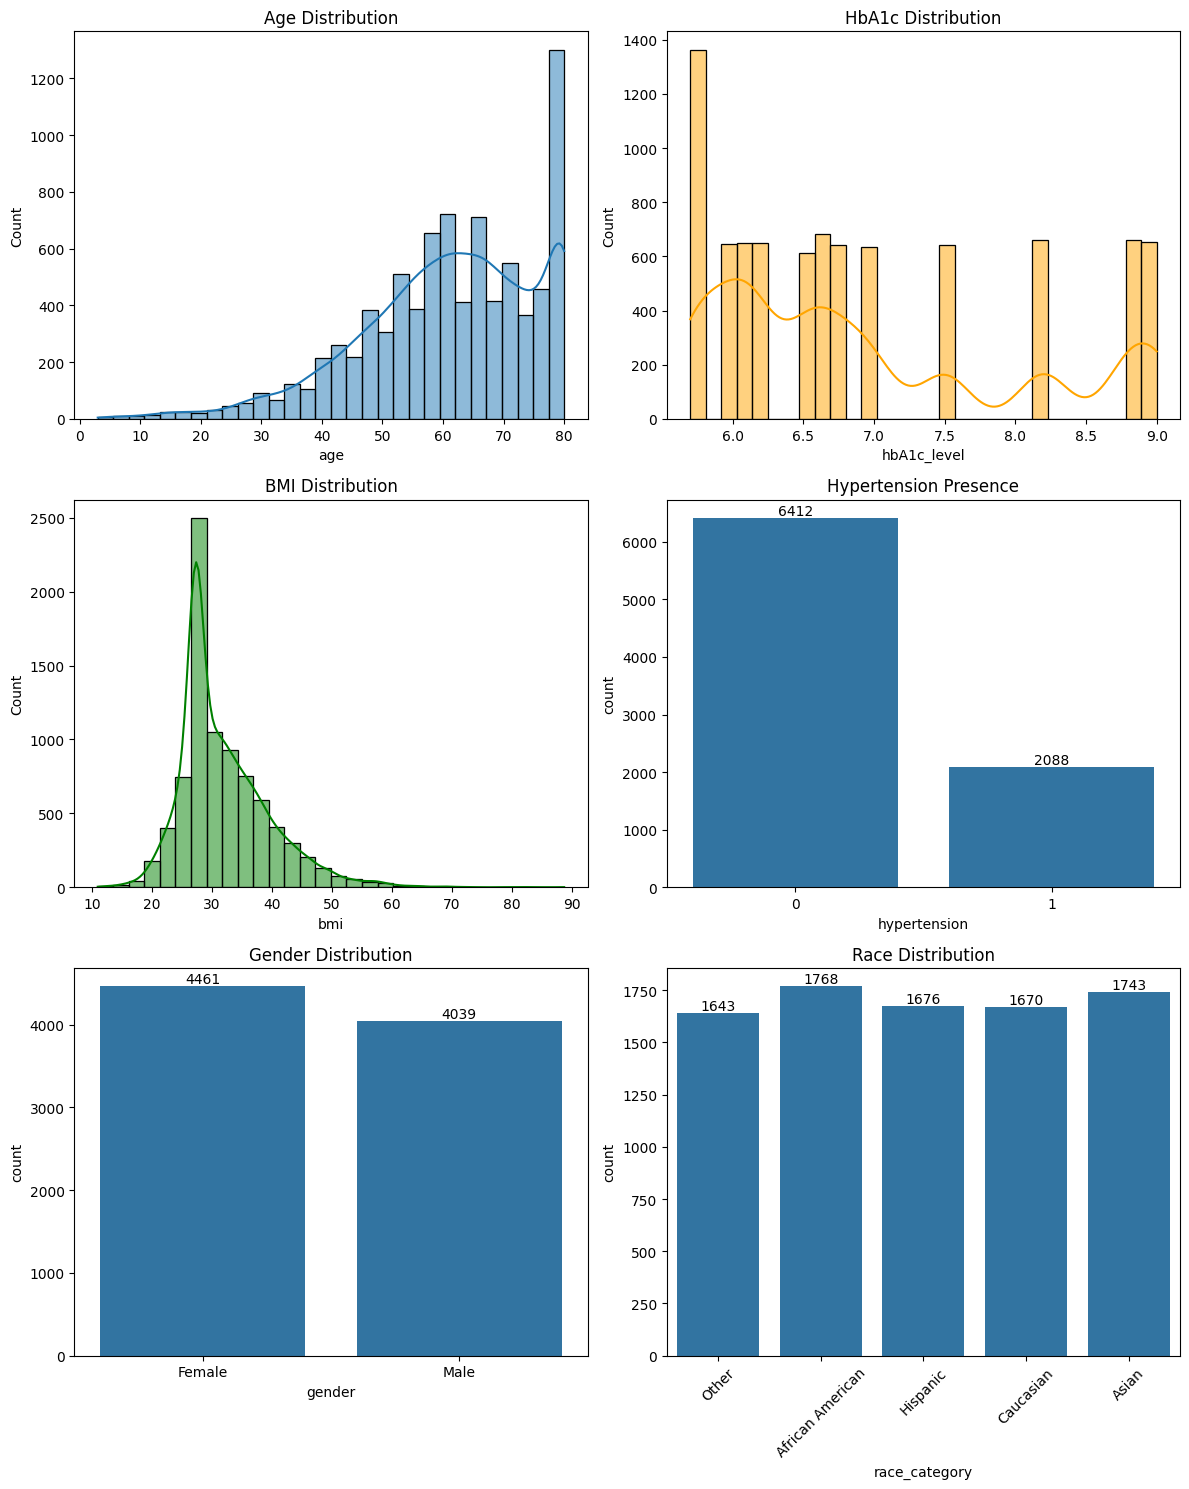

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Age Distribution
sns.histplot(diabetes_df['age'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title('Age Distribution')

# HbA1c
sns.histplot(diabetes_df['hbA1c_level'], bins=30, kde=True, color='orange', ax=axes[0,1])
axes[0,1].set_title('HbA1c Distribution')

# BMI
sns.histplot(diabetes_df['bmi'], bins=30, kde=True, color='green', ax=axes[1,0])
axes[1,0].set_title('BMI Distribution')

# Hypertension
sns.countplot(data=diabetes_df, x='hypertension', ax=axes[1,1])
axes[1,1].set_title('Hypertension Presence')
for p in axes[1,1].patches:
    height = p.get_height()
    axes[1,1].text(p.get_x() + p.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Gender
sns.countplot(data=diabetes_df, x='gender', ax=axes[2,0])
axes[2,0].set_title('Gender Distribution')
for p in axes[2,0].patches:
    height = p.get_height()
    axes[2,0].text(p.get_x() + p.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Race
sns.countplot(data=diabetes_df, x='race_category', ax=axes[2,1])
axes[2,1].set_title('Race Distribution')
axes[2,1].tick_params(axis='x', rotation=45)
for p in axes[2,1].patches:
    height = p.get_height()
    axes[2,1].text(p.get_x() + p.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


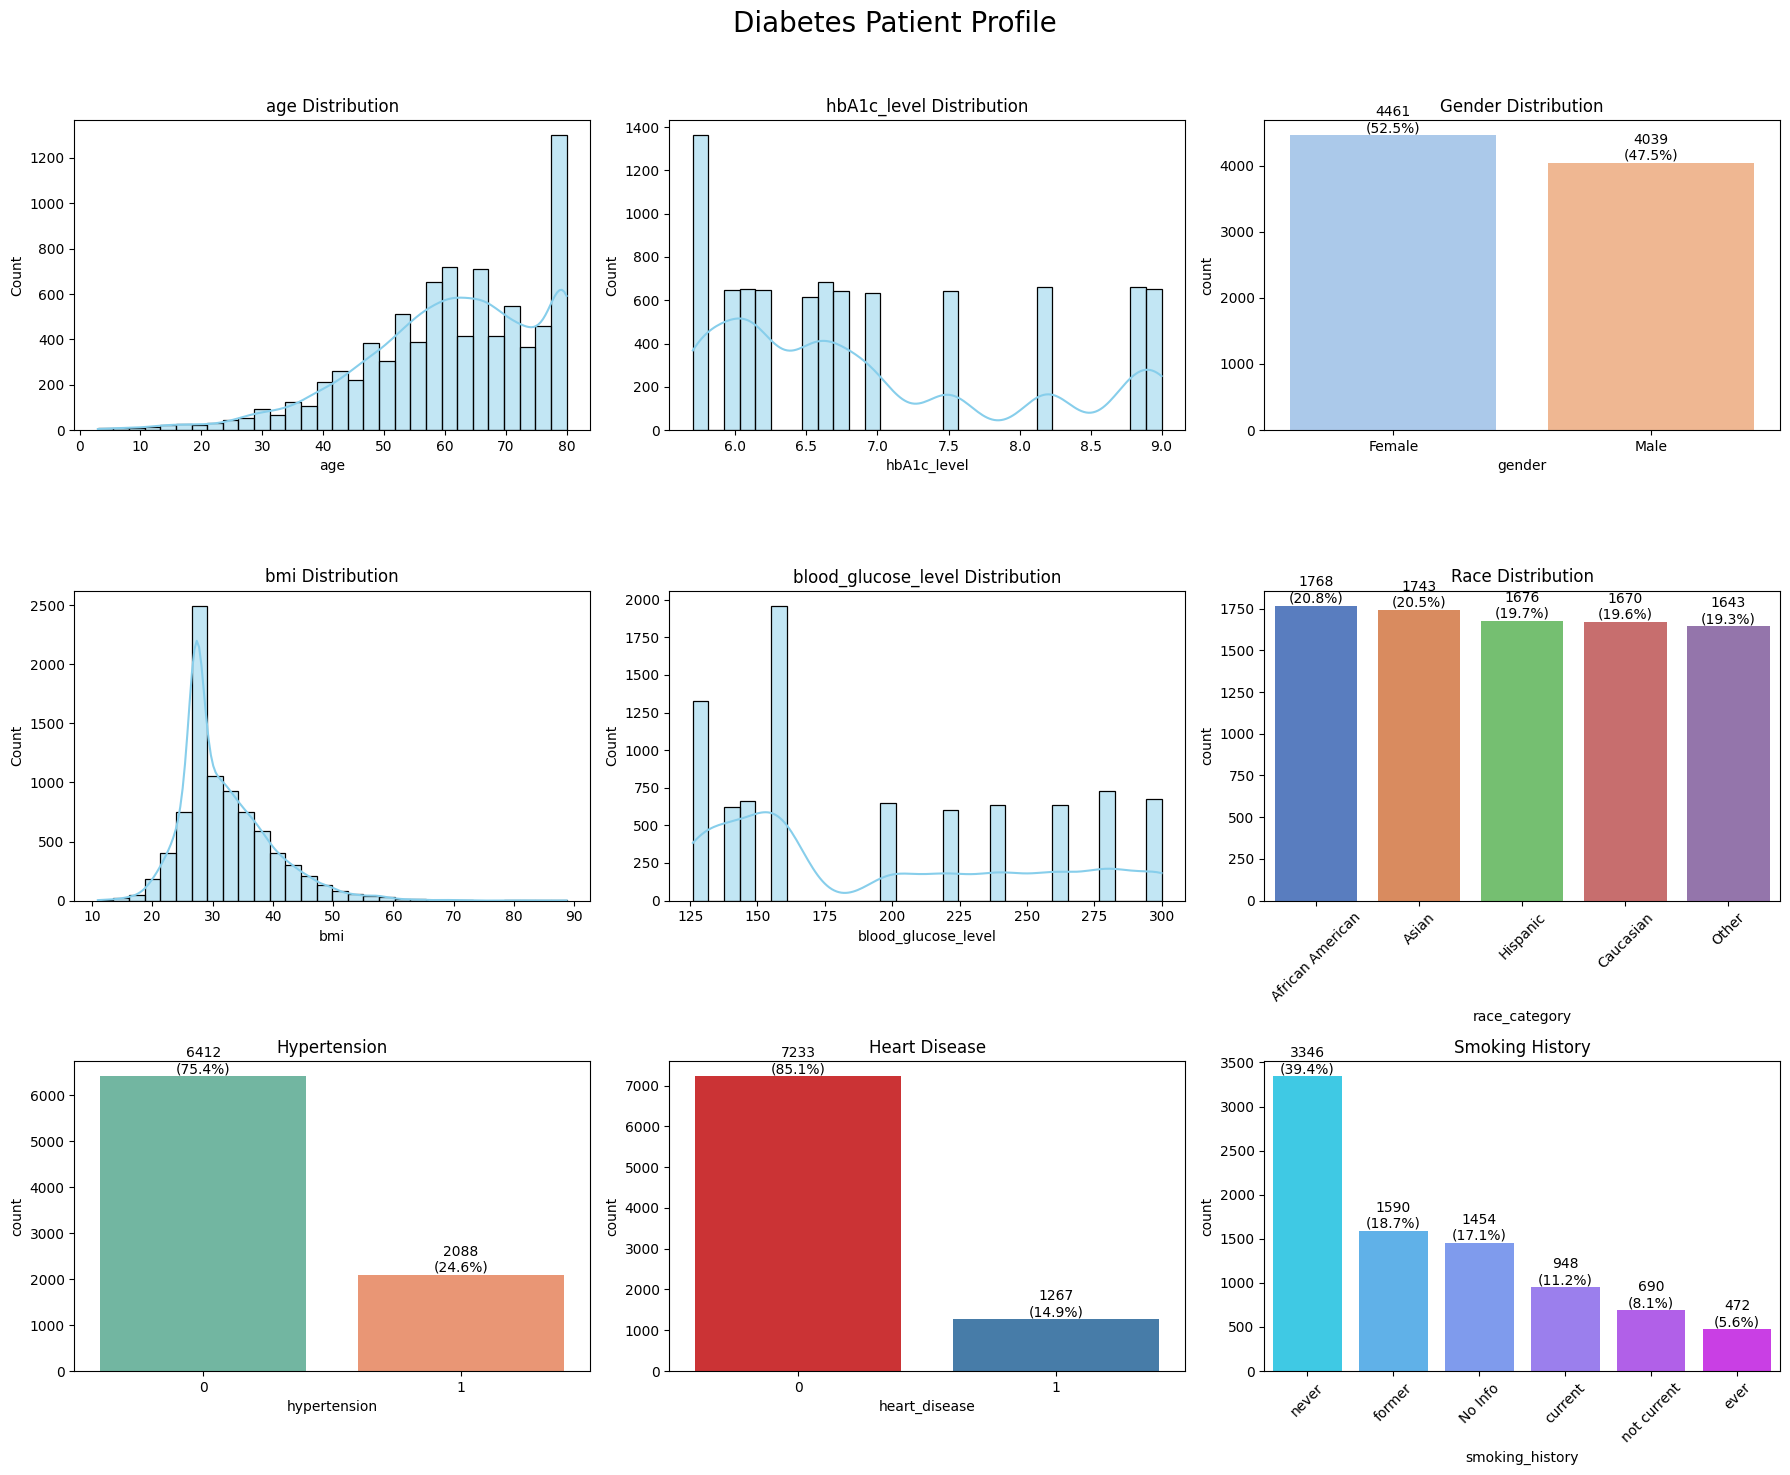

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter diabetes patients
diabetes_df = df[df['diabetes'] == 1]
total = diabetes_df.shape[0]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Diabetes Patient Profile', fontsize=20)

# ---- Numerical variables ----
numerical_cols = ['age', 'hbA1c_level', 'bmi', 'blood_glucose_level']

for i, col in enumerate(numerical_cols):
    ax = axes[i//2, i%2]
    sns.histplot(diabetes_df[col], bins=30, kde=True, color='skyblue', ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# ---- Gender ----
ax = axes[0,2]
sns.countplot(data=diabetes_df, x='gender', palette='pastel', ax=ax)
ax.set_title('Gender Distribution')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height, f'{int(height)}\n({height/total*100:.1f}%)', 
            ha='center', va='bottom')

# ---- Race ----
ax = axes[1,2]
sns.countplot(data=diabetes_df, x='race_category', palette='muted', order=diabetes_df['race_category'].value_counts().index, ax=ax)
ax.set_title('Race Distribution')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height, f'{int(height)}\n({height/total*100:.1f}%)', 
            ha='center', va='bottom')

# ---- Hypertension ----
ax = axes[2,0]
sns.countplot(data=diabetes_df, x='hypertension', palette='Set2', ax=ax)
ax.set_title('Hypertension')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height, f'{int(height)}\n({height/total*100:.1f}%)', 
            ha='center', va='bottom')

# ---- Heart Disease ----
ax = axes[2,1]
sns.countplot(data=diabetes_df, x='heart_disease', palette='Set1', ax=ax)
ax.set_title('Heart Disease')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height, f'{int(height)}\n({height/total*100:.1f}%)', 
            ha='center', va='bottom')

# ---- Smoking History ----
ax = axes[2,2]
sns.countplot(data=diabetes_df, x='smoking_history', palette='cool', order=diabetes_df['smoking_history'].value_counts().index, ax=ax)
ax.set_title('Smoking History')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height, f'{int(height)}\n({height/total*100:.1f}%)', 
            ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [34]:
# Overall Diabetes Profile

#Typical diabetes patient looks like this in this dataset:
#Age: ~61 years old, mostly older adults
#Gender: Slightly more likely female
#Race: Equally likely to be any major race
#Location: Spread across all regions
#Comorbidities: ~25% have hypertension, ~15% have heart disease
#Lifestyle: Most never smoked, but some have history of smoking
#Health metrics: Overweight/obese (BMI ~32), elevated blood sugar (HbA1c ~6.9%, glucose ~194 mg/dL)
#Insights for Intervention:
#Focus on weight management, blood sugar control, and screening for hypertension and heart disease.
#Smoking cessation programs can benefit the subset of current/former smokers.
# Key Insight: Diabetes patients are mostly older adults, overweight/obese, with high HbA1c and blood glucose.

# 2️⃣ Categorical Variables
#Gender
# Female: 52.5% (4461), 
# Male: 47.5% (4039)
# Gender Interpretation: Slightly more females than males in the diabetic population, but roughly balanced.
# Race interpretation:  Diabetes is evenly distributed across races in this dataset, no race dominates.
# Location interpretation : Diabetes patients are widely distributed geographically; no single location dominates.
# Hypertension interpretation : 24.6% have hypertension, 75.4% do not. Hypertension is a common comorbidity, but most diabetes patients do not have it.
# Heart disease interpretation : 14.9% have heart disease, 85.1% do not. Heart disease occurs in a smaller fraction of diabetic patients.
# Smoking history interpretation : Majority are never smokers, but a significant proportion has past or current smoking history. Missing data (“No Info”) accounts for ~17%.
# 

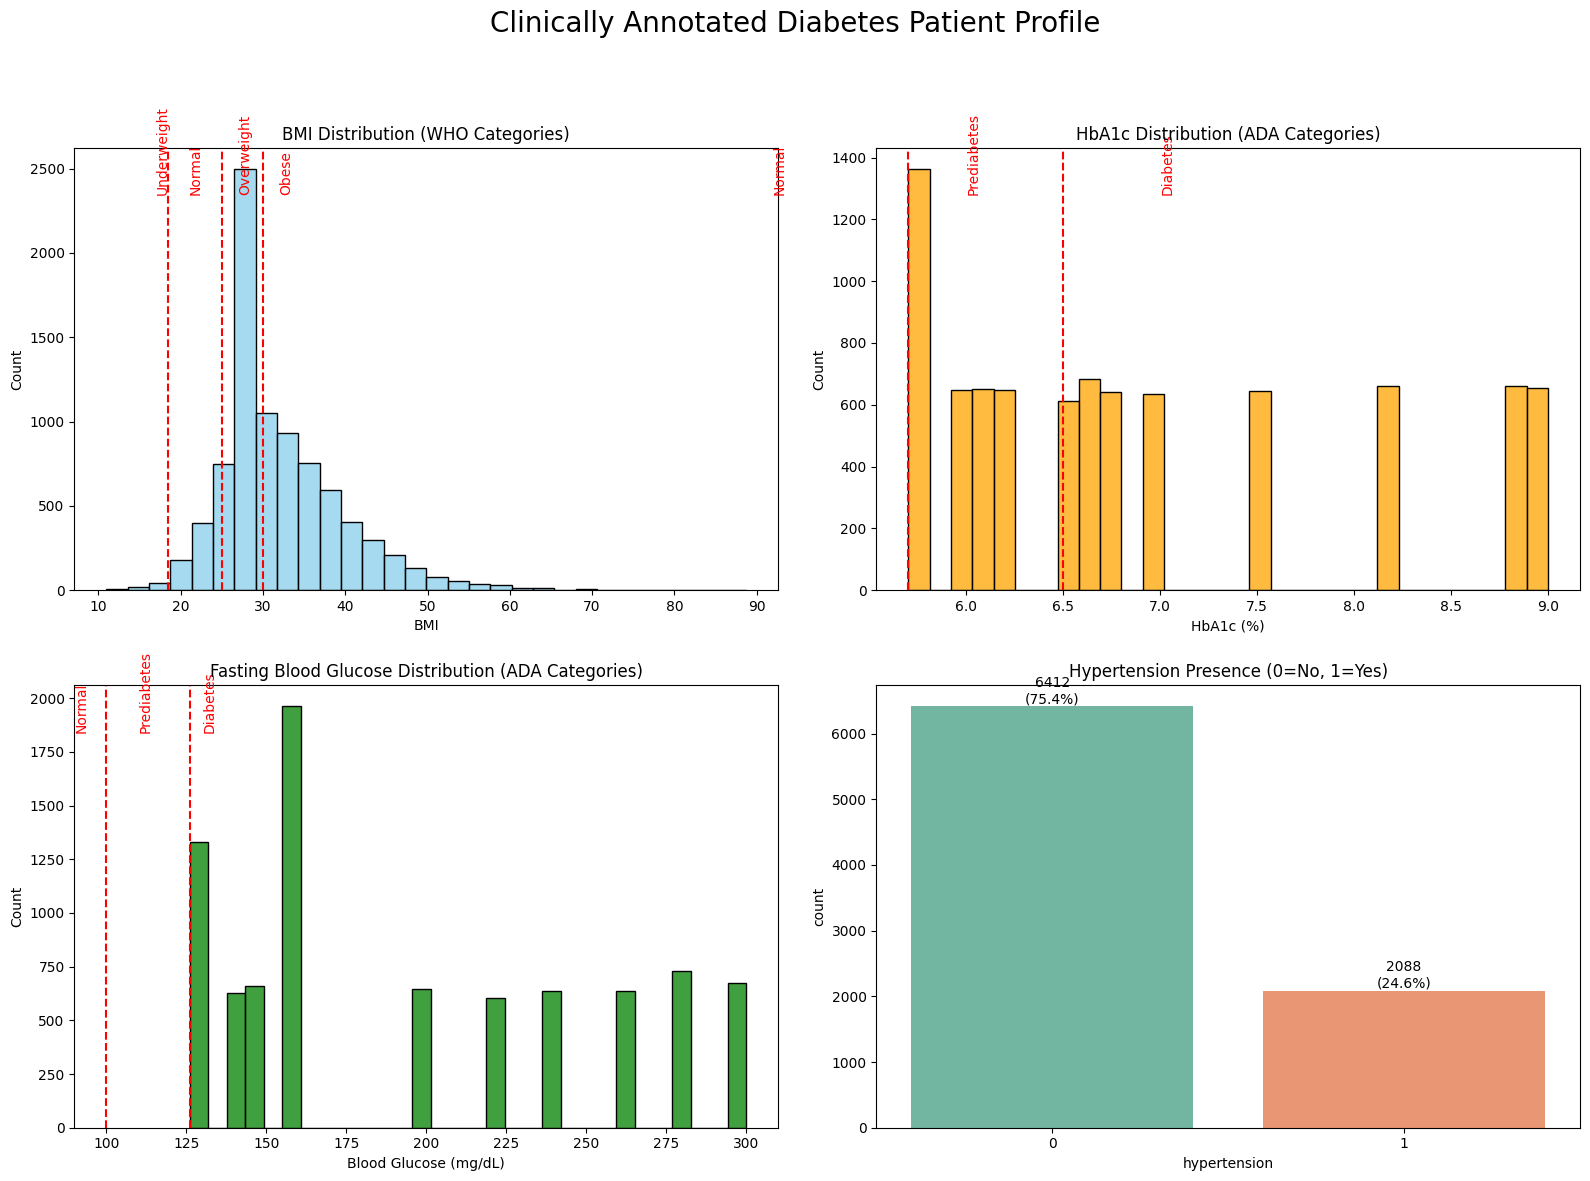

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter diabetes patients
diabetes_df = df[df['diabetes'] == 1]
total = diabetes_df.shape[0]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Clinically Annotated Diabetes Patient Profile", fontsize=20)

# ---- BMI with WHO categories ----
ax = axes[0,0]
sns.histplot(diabetes_df['bmi'], bins=30, kde=False, color='skyblue', ax=ax)
ax.set_title("BMI Distribution (WHO Categories)")
ax.set_xlabel("BMI")
ax.set_ylabel("Count")
# Add WHO threshold lines
for threshold in [18.5, 25, 30]:
    ax.axvline(threshold, color='red', linestyle='--')
ax.text(17, ax.get_ylim()[1]*0.9, 'Underweight', rotation=90, color='red')
ax.text(21, ax.get_ylim()[1]*0.9, 'Normal', rotation=90, color='red')
ax.text(27, ax.get_ylim()[1]*0.9, 'Overweight', rotation=90, color='red')
ax.text(32, ax.get_ylim()[1]*0.9, 'Obese', rotation=90, color='red')

# ---- HbA1c with ADA categories ----
ax = axes[0,1]
sns.histplot(diabetes_df['hbA1c_level'], bins=30, kde=False, color='orange', ax=ax)
ax.set_title("HbA1c Distribution (ADA Categories)")
ax.set_xlabel("HbA1c (%)")
ax.set_ylabel("Count")
for threshold in [5.7, 6.5]:
    ax.axvline(threshold, color='red', linestyle='--')
ax.text(5.0, ax.get_ylim()[1]*0.9, 'Normal', rotation=90, color='red')
ax.text(6.0, ax.get_ylim()[1]*0.9, 'Prediabetes', rotation=90, color='red')
ax.text(7.0, ax.get_ylim()[1]*0.9, 'Diabetes', rotation=90, color='red')

# ---- Blood Glucose with ADA categories ----
ax = axes[1,0]
sns.histplot(diabetes_df['blood_glucose_level'], bins=30, kde=False, color='green', ax=ax)
ax.set_title("Fasting Blood Glucose Distribution (ADA Categories)")
ax.set_xlabel("Blood Glucose (mg/dL)")
ax.set_ylabel("Count")
for threshold in [100, 126]:
    ax.axvline(threshold, color='red', linestyle='--')
ax.text(90, ax.get_ylim()[1]*0.9, 'Normal', rotation=90, color='red')
ax.text(110, ax.get_ylim()[1]*0.9, 'Prediabetes', rotation=90, color='red')
ax.text(130, ax.get_ylim()[1]*0.9, 'Diabetes', rotation=90, color='red')

# ---- Hypertension presence ----
ax = axes[1,1]
sns.countplot(data=diabetes_df, x='hypertension', palette='Set2', ax=ax)
ax.set_title("Hypertension Presence (0=No, 1=Yes)")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height, f'{int(height)}\n({height/total*100:.1f}%)', 
            ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




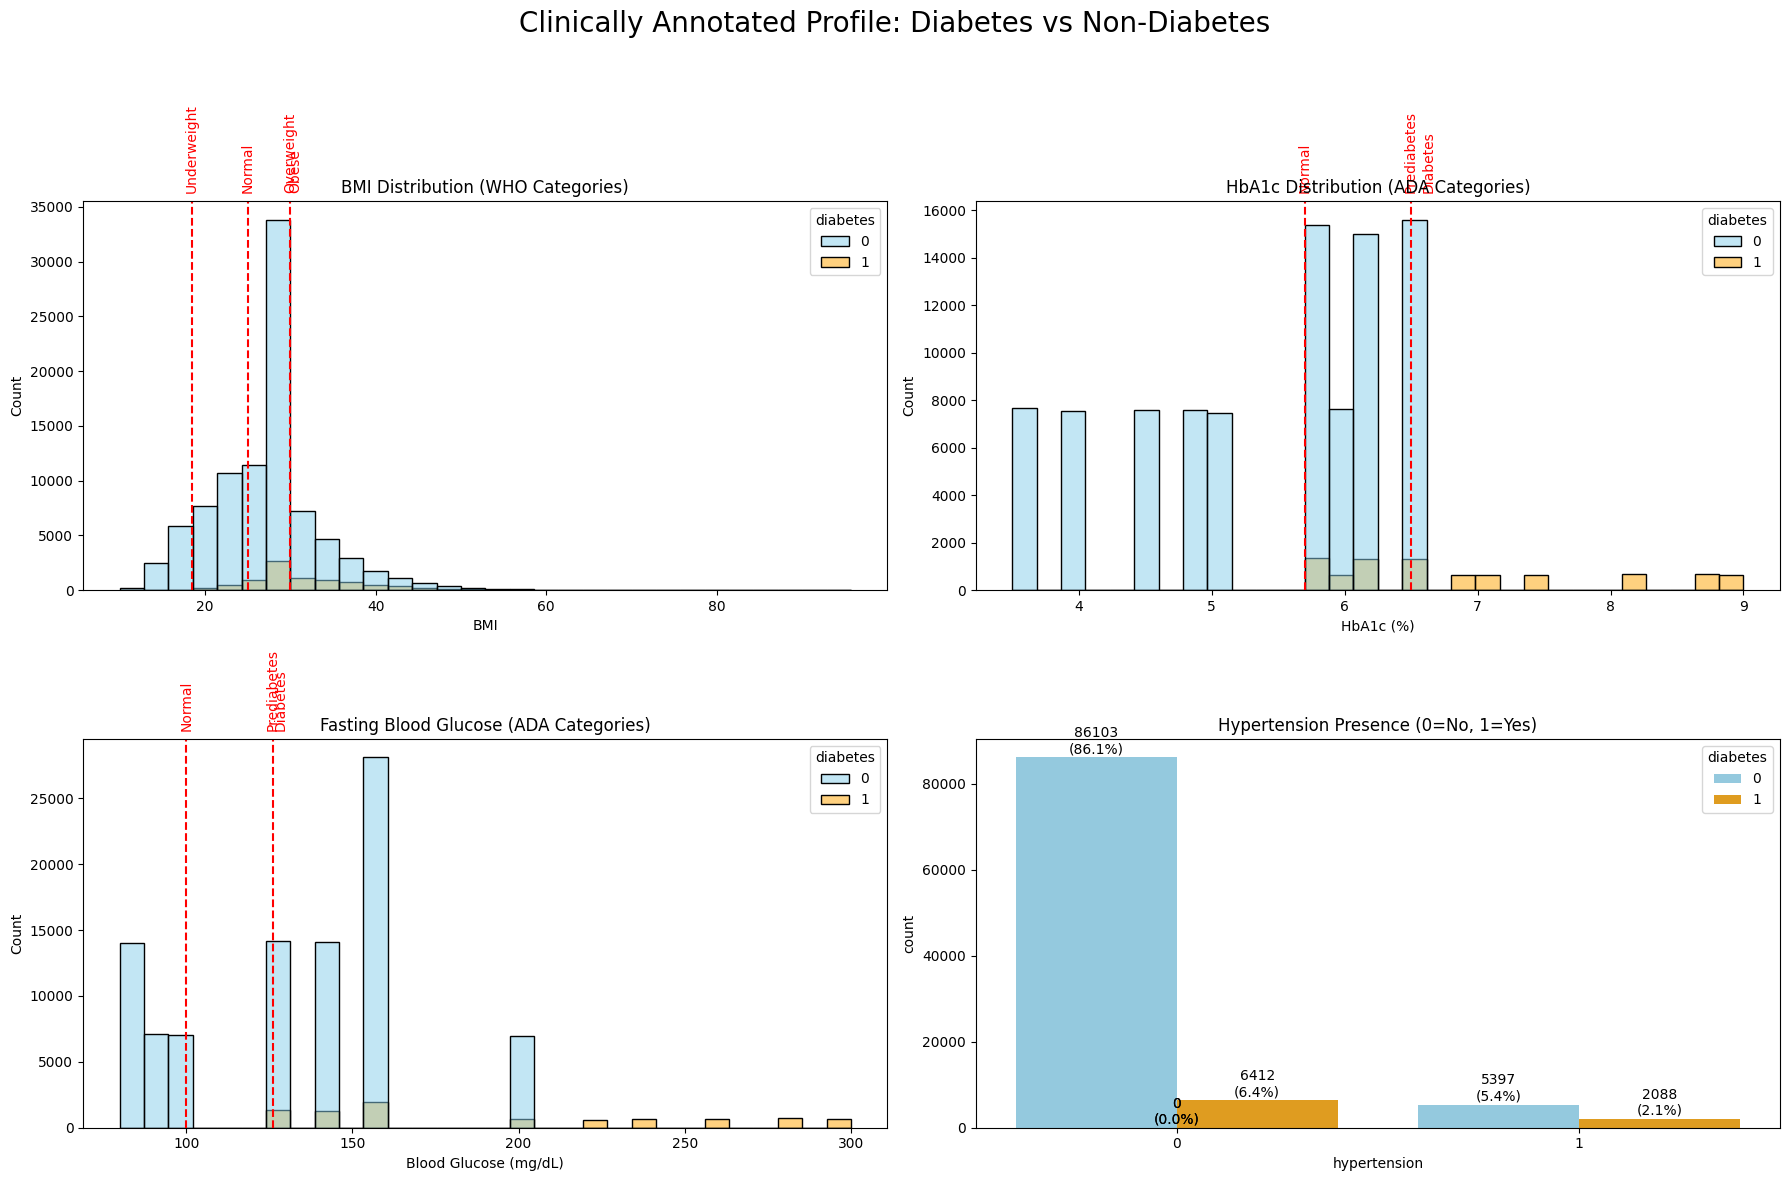

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total patients
total = df.shape[0]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Clinically Annotated Profile: Diabetes vs Non-Diabetes", fontsize=20)

# Helper function to place labels above vertical lines
def add_vertical_labels(ax, thresholds, labels):
    ylim = ax.get_ylim()[1]
    for i, thresh in enumerate(thresholds):
        ax.axvline(thresh, color='red', linestyle='--')
        ax.text(thresh, ylim*1.02, labels[i], rotation=90, color='red', fontsize=10,
                ha='center', va='bottom')
    # Last label (after last threshold)
    ax.text(thresholds[-1]+(thresholds[-1]*0.02), ylim*1.02, labels[-1], rotation=90, color='red', fontsize=10,
            ha='center', va='bottom')

# ---- BMI ----
ax = axes[0,0]
sns.histplot(df, x='bmi', hue='diabetes', bins=30, kde=False, palette=['skyblue','orange'], ax=ax)
ax.set_title("BMI Distribution (WHO Categories)")
ax.set_xlabel("BMI")
ax.set_ylabel("Count")
bmi_thresholds = [18.5, 25, 30]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese"]
add_vertical_labels(ax, bmi_thresholds, bmi_labels)

# ---- HbA1c ----
ax = axes[0,1]
sns.histplot(df, x='hbA1c_level', hue='diabetes', bins=30, kde=False, palette=['skyblue','orange'], ax=ax)
ax.set_title("HbA1c Distribution (ADA Categories)")
ax.set_xlabel("HbA1c (%)")
ax.set_ylabel("Count")
hba_thresholds = [5.7, 6.5]
hba_labels = ["Normal", "Prediabetes", "Diabetes"]
add_vertical_labels(ax, hba_thresholds, hba_labels)

# ---- Blood Glucose ----
ax = axes[1,0]
sns.histplot(df, x='blood_glucose_level', hue='diabetes', bins=30, kde=False, palette=['skyblue','orange'], ax=ax)
ax.set_title("Fasting Blood Glucose (ADA Categories)")
ax.set_xlabel("Blood Glucose (mg/dL)")
ax.set_ylabel("Count")
glucose_thresholds = [100, 126]
glucose_labels = ["Normal", "Prediabetes", "Diabetes"]
add_vertical_labels(ax, glucose_thresholds, glucose_labels)

# ---- Hypertension ----
ax = axes[1,1]
sns.countplot(data=df, x='hypertension', hue='diabetes', palette=['skyblue','orange'], ax=ax)
ax.set_title("Hypertension Presence (0=No, 1=Yes)")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + total*0.002, f'{int(height)}\n({height/total*100:.1f}%)', 
            ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Text(0.5, 1.0, 'Hypertension Presence (0=No, 1=Yes)')

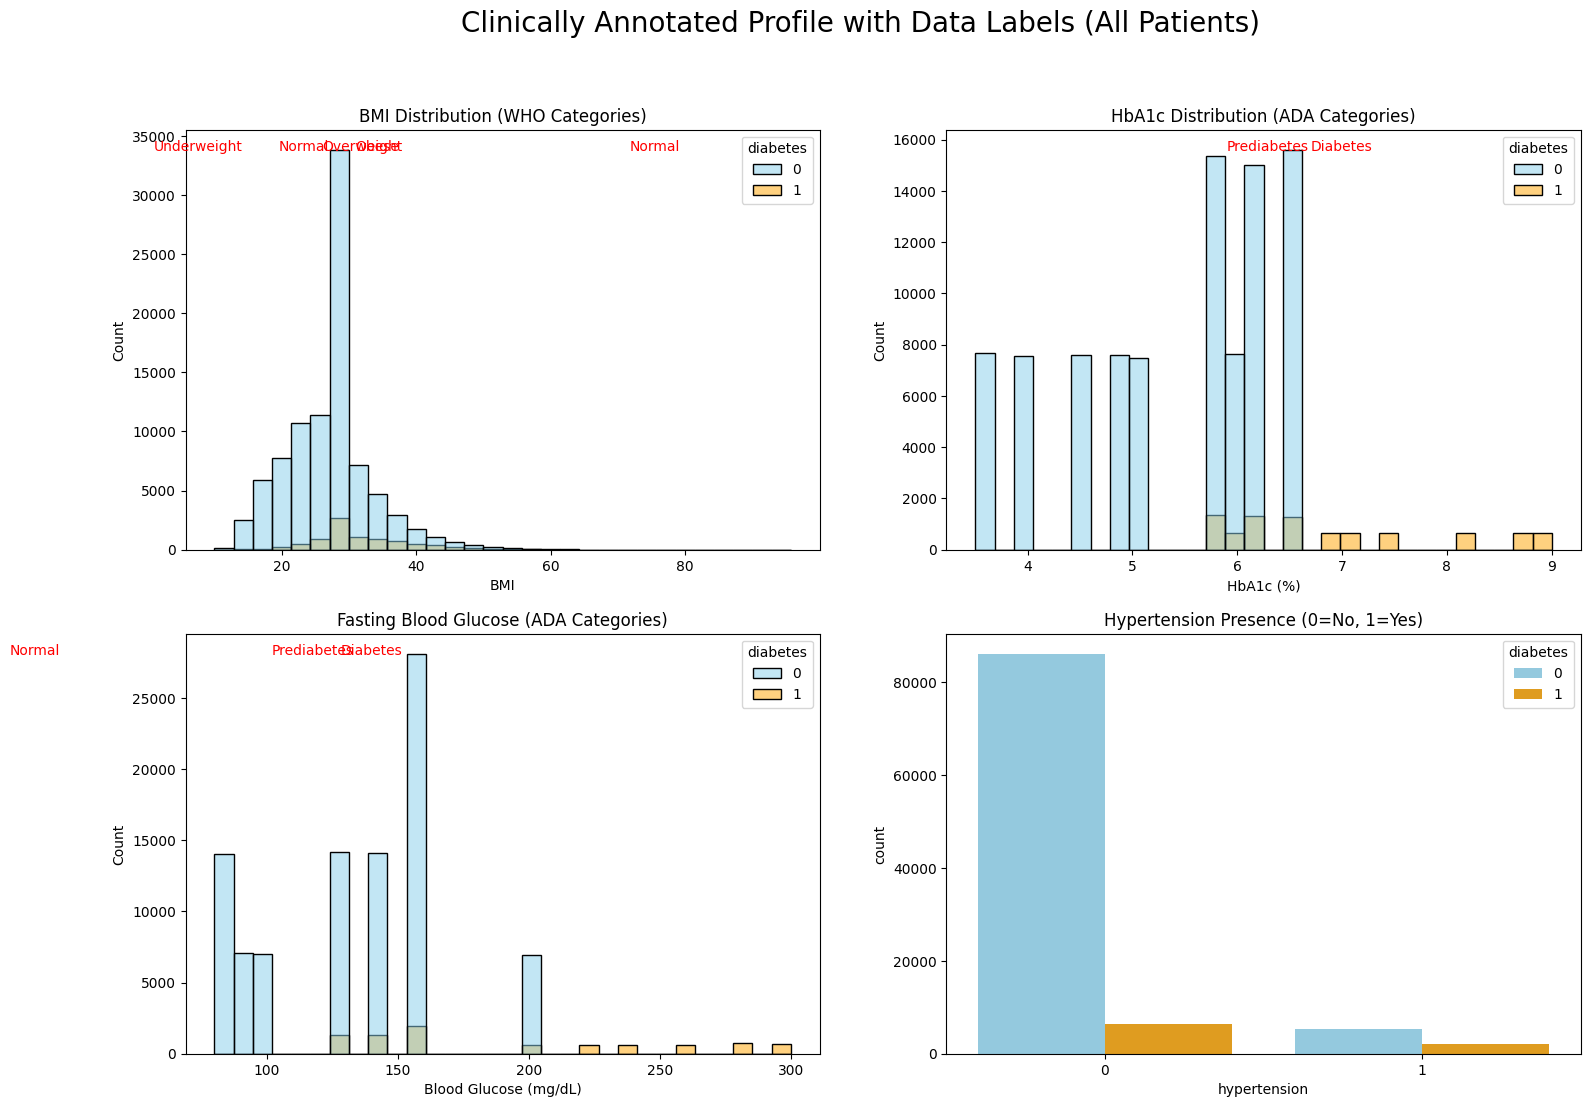

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to assign BMI category
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

# Function to assign HbA1c category
def hba1c_category(hba):
    if hba < 5.7:
        return "Normal"
    elif hba < 6.5:
        return "Prediabetes"
    else:
        return "Diabetes"

# Function to assign Blood Glucose category
def glucose_category(glucose):
    if glucose < 100:
        return "Normal"
    elif glucose < 126:
        return "Prediabetes"
    else:
        return "Diabetes"

df['bmi_cat'] = df['bmi'].apply(bmi_category)
df['hba1c_cat'] = df['hbA1c_level'].apply(hba1c_category)
df['glucose_cat'] = df['blood_glucose_level'].apply(glucose_category)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Clinically Annotated Profile with Data Labels (All Patients)", fontsize=20)
total = df.shape[0]

# ---- BMI ----
ax = axes[0,0]
sns.histplot(df, x='bmi', hue='diabetes', bins=30, kde=False, palette=['skyblue','orange'], ax=ax)
ax.set_title("BMI Distribution (WHO Categories)")
ax.set_xlabel("BMI")
ax.set_ylabel("Count")
# Add category labels on top
for threshold, label in zip([0, 18.5, 25, 30, 50], ["Underweight","Normal","Overweight","Obese",""]):
    ax.text(threshold+1, ax.get_ylim()[1]*0.95, label, color='red', rotation=0)

# ---- HbA1c ----
ax = axes[0,1]
sns.histplot(df, x='hbA1c_level', hue='diabetes', bins=30, kde=False, palette=['skyblue','orange'], ax=ax)
ax.set_title("HbA1c Distribution (ADA Categories)")
ax.set_xlabel("HbA1c (%)")
ax.set_ylabel("Count")
for threshold, label in zip([0, 5.7, 6.5, 10], ["Normal","Prediabetes","Diabetes",""]):
    ax.text(threshold+0.2, ax.get_ylim()[1]*0.95, label, color='red', rotation=0)

# ---- Blood Glucose ----
ax = axes[1,0]
sns.histplot(df, x='blood_glucose_level', hue='diabetes', bins=30, kde=False, palette=['skyblue','orange'], ax=ax)
ax.set_title("Fasting Blood Glucose (ADA Categories)")
ax.set_xlabel("Blood Glucose (mg/dL)")
ax.set_ylabel("Count")
for threshold, label in zip([0, 100, 126, 350], ["Normal","Prediabetes","Diabetes",""]):
    ax.text(threshold+2, ax.get_ylim()[1]*0.95, label, color='red', rotation=0)

# ---- Hypertension ----
ax = axes[1,1]
sns.countplot(data=df, x='hypertension', hue='diabetes', palette=['skyblue','orange'], ax=ax)
ax.set_title("Hypertension Presence (0=No, 1=Yes)")







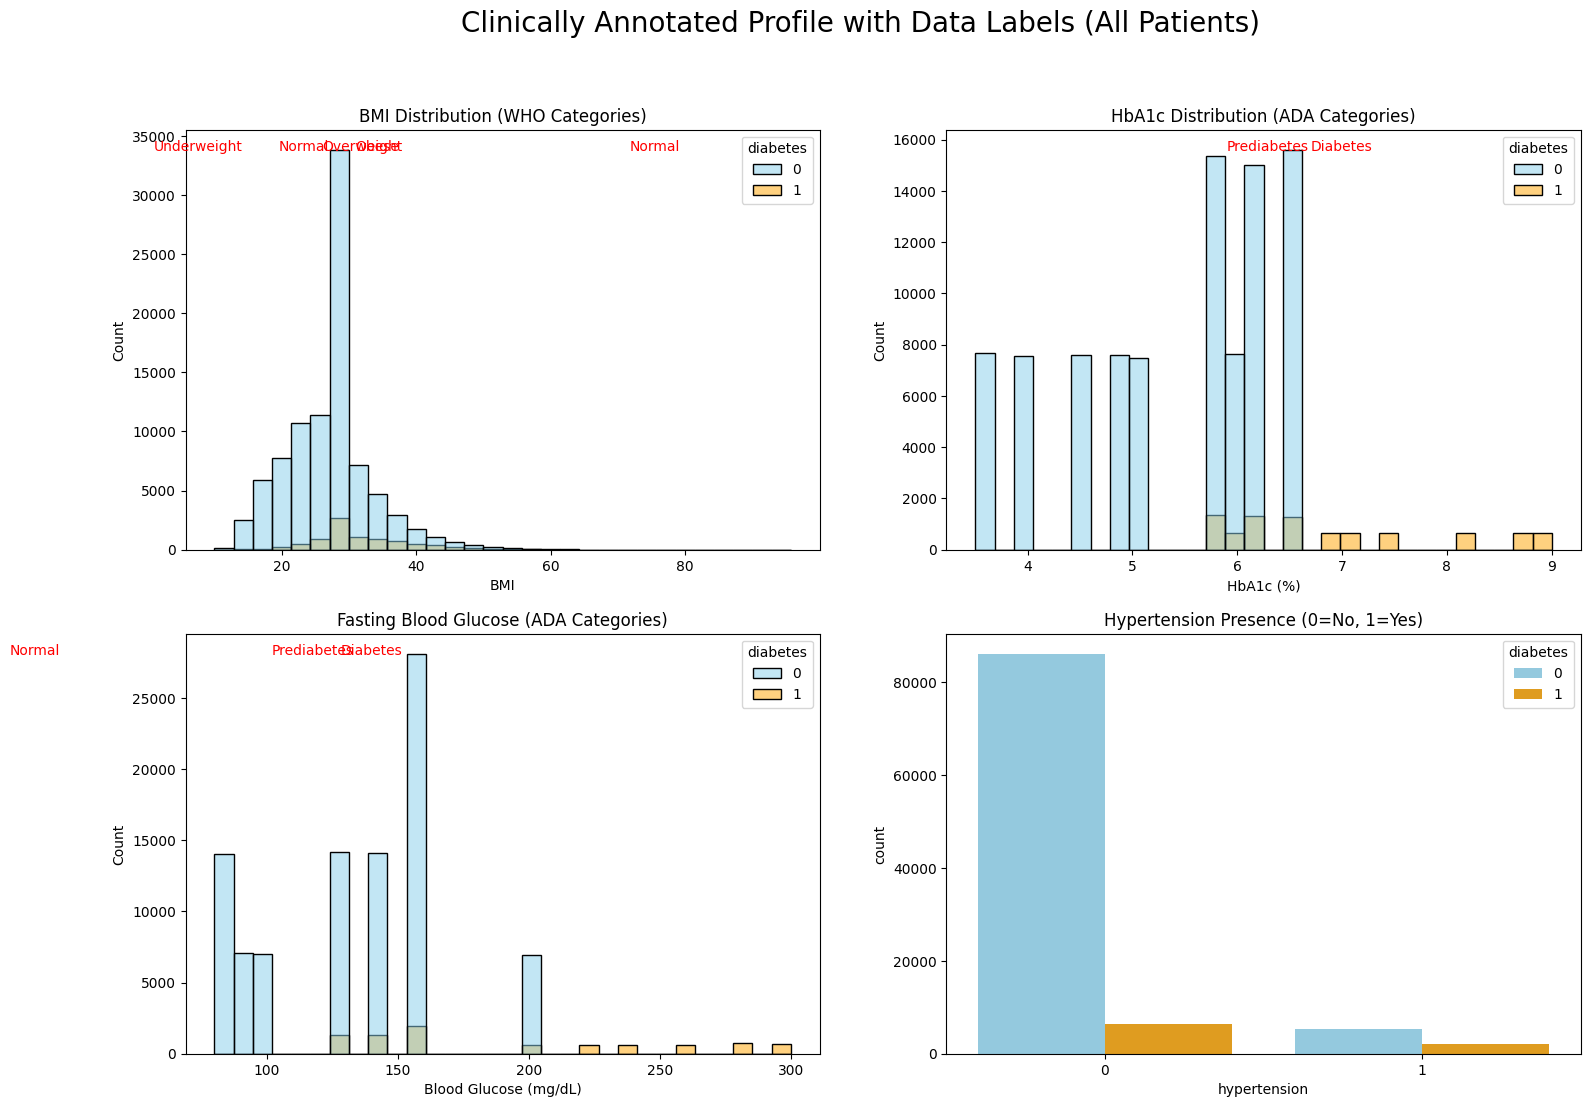

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to assign BMI category
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

# Function to assign HbA1c category
def hba1c_category(hba):
    if hba < 5.7:
        return "Normal"
    elif hba < 6.5:
        return "Prediabetes"
    else:
        return "Diabetes"

# Function to assign Blood Glucose category
def glucose_category(glucose):
    if glucose < 100:
        return "Normal"
    elif glucose < 126:
        return "Prediabetes"
    else:
        return "Diabetes"

df['bmi_cat'] = df['bmi'].apply(bmi_category)
df['hba1c_cat'] = df['hbA1c_level'].apply(hba1c_category)
df['glucose_cat'] = df['blood_glucose_level'].apply(glucose_category)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Clinically Annotated Profile with Data Labels (All Patients)", fontsize=20)
total = df.shape[0]

# ---- BMI ----
ax = axes[0,0]
sns.histplot(df, x='bmi', hue='diabetes', bins=30, kde=False, palette=['skyblue','orange'], ax=ax)
ax.set_title("BMI Distribution (WHO Categories)")
ax.set_xlabel("BMI")
ax.set_ylabel("Count")
# Add category labels on top
for threshold, label in zip([0, 18.5, 25, 30, 50], ["Underweight","Normal","Overweight","Obese",""]):
    ax.text(threshold+1, ax.get_ylim()[1]*0.95, label, color='red', rotation=0)

# ---- HbA1c ----
ax = axes[0,1]
sns.histplot(df, x='hbA1c_level', hue='diabetes', bins=30, kde=False, palette=['skyblue','orange'], ax=ax)
ax.set_title("HbA1c Distribution (ADA Categories)")
ax.set_xlabel("HbA1c (%)")
ax.set_ylabel("Count")
for threshold, label in zip([0, 5.7, 6.5, 10], ["Normal","Prediabetes","Diabetes",""]):
    ax.text(threshold+0.2, ax.get_ylim()[1]*0.95, label, color='red', rotation=0)

# ---- Blood Glucose ----
ax = axes[1,0]
sns.histplot(df, x='blood_glucose_level', hue='diabetes', bins=30, kde=False, palette=['skyblue','orange'], ax=ax)
ax.set_title("Fasting Blood Glucose (ADA Categories)")
ax.set_xlabel("Blood Glucose (mg/dL)")
ax.set_ylabel("Count")
for threshold, label in zip([0, 100, 126, 350], ["Normal","Prediabetes","Diabetes",""]):
    ax.text(threshold+2, ax.get_ylim()[1]*0.95, label, color='red', rotation=0)

# ---- Hypertension ----
ax = axes[1,1]
sns.countplot(data=df, x='hypertension', hue='diabetes', palette=['skyblue','orange'], ax=ax)
ax.set_title("Hypertension Presence (0=No, 1=Yes)")

# proper labeling
def add_vertical_labels(ax, thresholds, labels):
    ylim = ax.get_ylim()[1]
    y_pos = ylim * 0.9  # vertical position inside plot (90% height)
    offset = 0.5  # horizontal offset
    
    for i, thresh in enumerate(thresholds):
        ax.axvline(thresh, color='red', linestyle='--')
        # Decide offset direction for label
        if i == 0:
            ha = 'right'
            x_pos = thresh - offset  # first label left of line
        else:
            ha = 'left'
            x_pos = thresh + offset  # middle labels right of line
        ax.text(x_pos, y_pos, labels[i], color='red', fontsize=10,
                ha=ha, va='center')
    
# Last label: put it left of last threshold (to avoid going out)
    ax.text(thresholds[-1] - offset, y_pos, labels[-1], color='red', fontsize=10,
            ha='right', va='center')





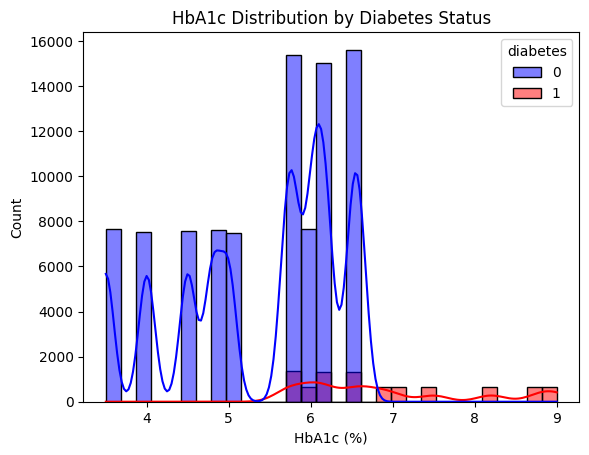

In [39]:
# Compare diabetes vs non diabetes in the same plot
# Example for HbA1c
sns.histplot(df, x='hbA1c_level', hue='diabetes', bins=30, kde=True, palette=['blue','red'])
plt.title("HbA1c Distribution by Diabetes Status")
plt.xlabel("HbA1c (%)")
plt.ylabel("Count")
plt.show()


In [40]:
# Random Forest with clinical categories + Numeric Modeling 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib



In [41]:
# Create WHO/ADA Clinical Categories for EDA only. these categories are not used in the model. only for clinical interpretation.
# BMI categories (WHO)
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 25, 30, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

# HbA1c categories (ADA)
df['hba1c_category'] = pd.cut(
    df['hbA1c_level'],
    bins=[0, 5.7, 6.5, float('inf')],
    labels=['Normal', 'Prediabetes', 'Diabetes']
)

# Blood glucose categories (ADA)
df['glucose_category'] = pd.cut(
    df['blood_glucose_level'],
    bins=[0, 100, 126, float('inf')],
    labels=['Normal', 'Prediabetes', 'Diabetes']
)


In [42]:
#One-hot encoding for gender (recommended for ML)
df = pd.get_dummies(df, columns=['gender'], drop_first=False)



In [43]:
# Select features for Modeling 
# keep only numerics + medical condition flags 

# Base numeric + medical features
feature_cols = [
    'age',
    'bmi',
    'hbA1c_level',
    'blood_glucose_level',
    'hypertension',
    'heart_disease'
]

# Add all gender dummy columns dynamically
gender_cols = [col for col in df.columns if col.startswith("gender_")]
feature_cols += gender_cols

X = df[feature_cols]
y = df['diabetes']



In [44]:
 # Train/Test Split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [45]:
# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=300, # number of trees
    max_depth=None, # let trees expand fully
    random_state=42, # ensures reproducibility
    class_weight='balanced' # handle class imbalance
)

rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



Accuracy: 0.9684

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.92      0.69      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.94      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



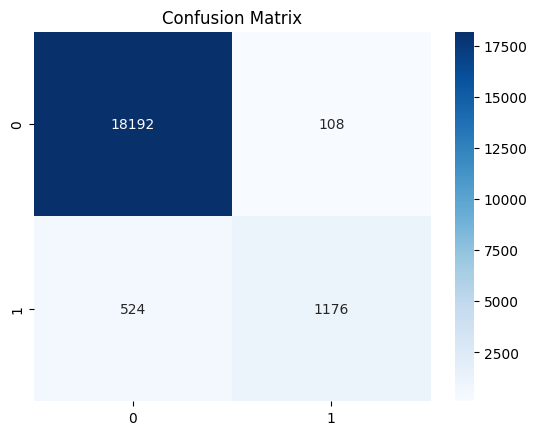

In [46]:
# Predictions + Evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


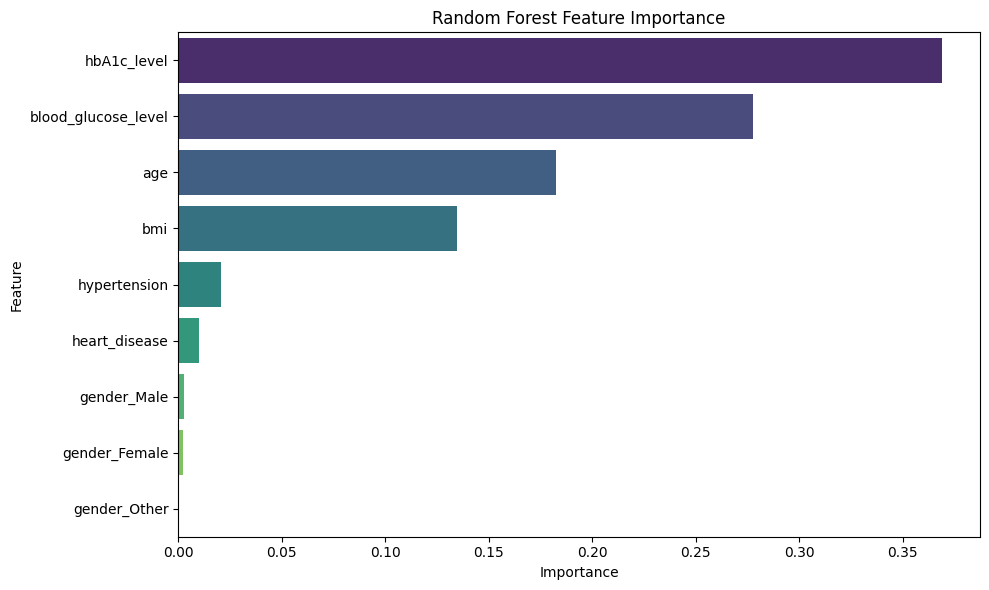

In [47]:
# Feature Importance Plot
importances = rf.feature_importances_
feat_imp = pd.DataFrame({'Feature': feature_cols, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


In [48]:
# which cols contains NaNs
X_train.isna().sum()


age                    0
bmi                    0
hbA1c_level            0
blood_glucose_level    0
hypertension           0
heart_disease          0
gender_Female          0
gender_Male            0
gender_Other           0
dtype: int64

In [49]:
# Feature columns
features = [
    'age', 'bmi', 'hbA1c_level', 'blood_glucose_level',
    'hypertension', 'heart_disease',
    'gender_Female', 'gender_Male', 'gender_Other'
]

X = df[features]
y = df['diabetes']



In [50]:
from sklearn.model_selection import train_test_split

# Features and target
features = [
    'age', 'bmi', 'hbA1c_level', 'blood_glucose_level',
    'hypertension', 'heart_disease',
    'gender_Female', 'gender_Male', 'gender_Other'
]
X = df[features]
y = df['diabetes']
# do this before SMOTE
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [51]:
# apply SMOTE on training set only 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


In [52]:
# Train Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sm, y_train_sm)

# Predictions
y_pred = rf.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9618
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18300
           1       0.81      0.72      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.89      0.85      0.87     20000
weighted avg       0.96      0.96      0.96     20000



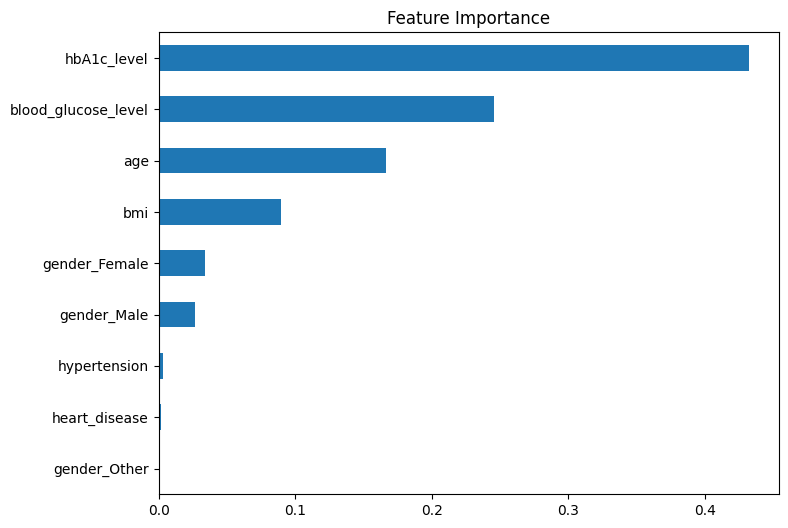

In [53]:
# Feature Importance 
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()


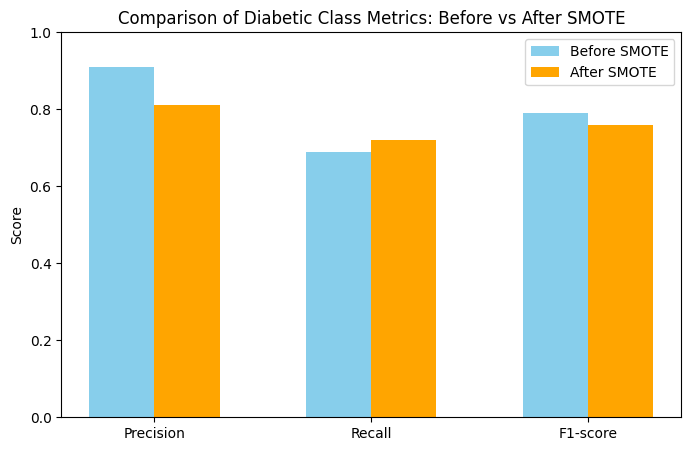

In [54]:
import matplotlib.pyplot as plt

metrics_before = [0.91, 0.69, 0.79]  # precision, recall, f1-score for diabetic class
metrics_after = [0.81, 0.72, 0.76]

labels = ['Precision', 'Recall', 'F1-score']

x = range(len(labels))
plt.figure(figsize=(8,5))
plt.bar([i-0.15 for i in x], metrics_before, width=0.3, label='Before SMOTE', color='skyblue')
plt.bar([i+0.15 for i in x], metrics_after, width=0.3, label='After SMOTE', color='orange')
plt.ylim(0,1)
plt.xticks(x, labels)
plt.title("Comparison of Diabetic Class Metrics: Before vs After SMOTE")
plt.ylabel("Score")
plt.legend()
plt.show()


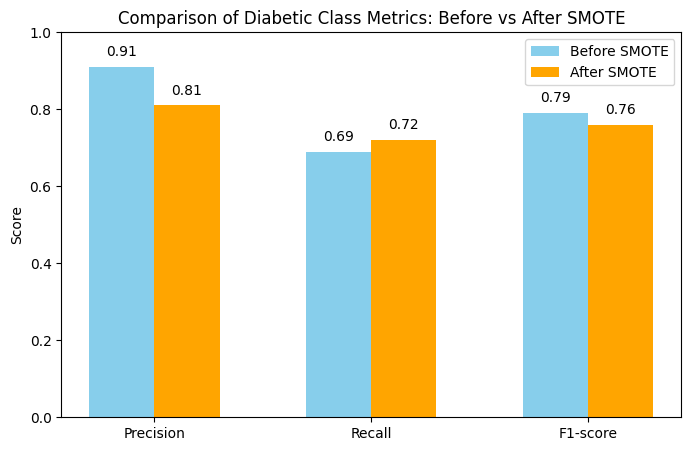

In [55]:
import matplotlib.pyplot as plt

metrics_before = [0.91, 0.69, 0.79]  # precision, recall, f1-score for diabetic class
metrics_after = [0.81, 0.72, 0.76]

labels = ['Precision', 'Recall', 'F1-score']

x = range(len(labels))
plt.figure(figsize=(8,5))

bars_before = plt.bar([i-0.15 for i in x], metrics_before, width=0.3, label='Before SMOTE', color='skyblue')
bars_after = plt.bar([i+0.15 for i in x], metrics_after, width=0.3, label='After SMOTE', color='orange')

plt.ylim(0,1)
plt.xticks(x, labels)
plt.title("Comparison of Diabetic Class Metrics: Before vs After SMOTE")
plt.ylabel("Score")
plt.legend()

# Add value labels on top of bars
for bar in bars_before:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=10)

for bar in bars_after:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.show()
# nos are all correct. 


In [56]:
# created on 5th dec. checked nos. they are correct. 
# Confusion matrix (After SMOTE)
cm_after = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (After SMOTE):")
print(cm_after)

# Classification report (After SMOTE)
print("\nClassification Report (After SMOTE):")
print(classification_report(y_test, y_pred))


Confusion Matrix (After SMOTE):
[[18016   284]
 [  480  1220]]

Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18300
           1       0.81      0.72      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.89      0.85      0.87     20000
weighted avg       0.96      0.96      0.96     20000



In [57]:
# 3️⃣ Confusion matrix
cm_after = confusion_matrix(y_test, y_pred_after)
print("Confusion Matrix (After SMOTE):")
print(cm_after)

# Optional: classification report
print("\nClassification Report (After SMOTE):")
print(classification_report(y_test, y_pred_after))


NameError: name 'y_pred_after' is not defined

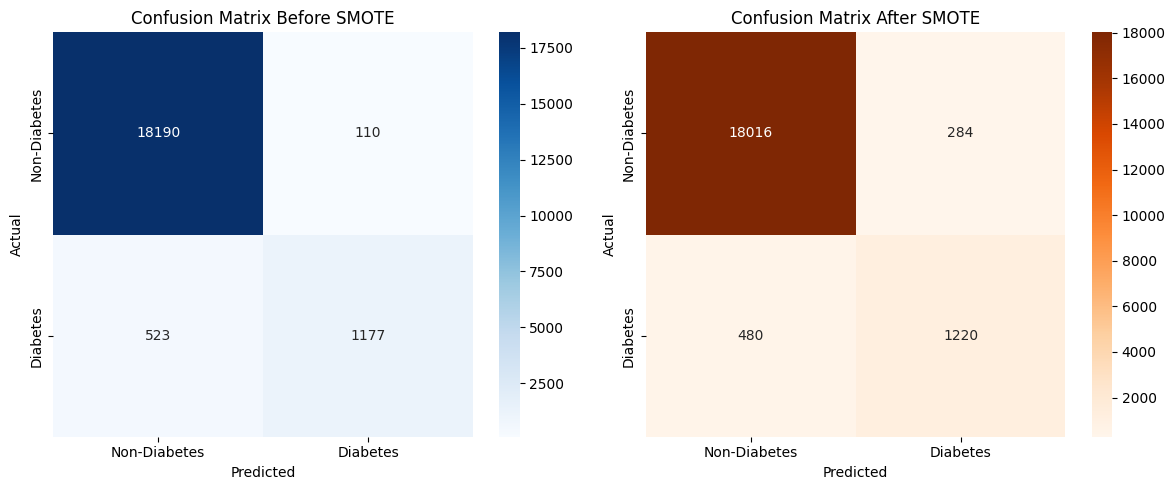

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrices 
cm_before = [[18190, 110],   # Before SMOTE
             [523, 1177]]

cm_after = [[18016, 284],    # After SMOTE
            [480, 1220]]

labels = ['Non-Diabetes', 'Diabetes']

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Before SMOTE
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Confusion Matrix Before SMOTE")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# After SMOTE
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Confusion Matrix After SMOTE")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [ ]:
#SMOTE improves recall for diabetes. Detects slightly more actual diabetics (72% vs 69%) which is crucial in healthcare - better at identifying at-risk patients
# slight trade off in precision and recall - you predict more diabetics, some are false positives--- precision drops from 0.91 to 0.81 
# Before SMOTE - the model is overconfident in predicting non-diabetics. After SMOTE predictions are more balanced 

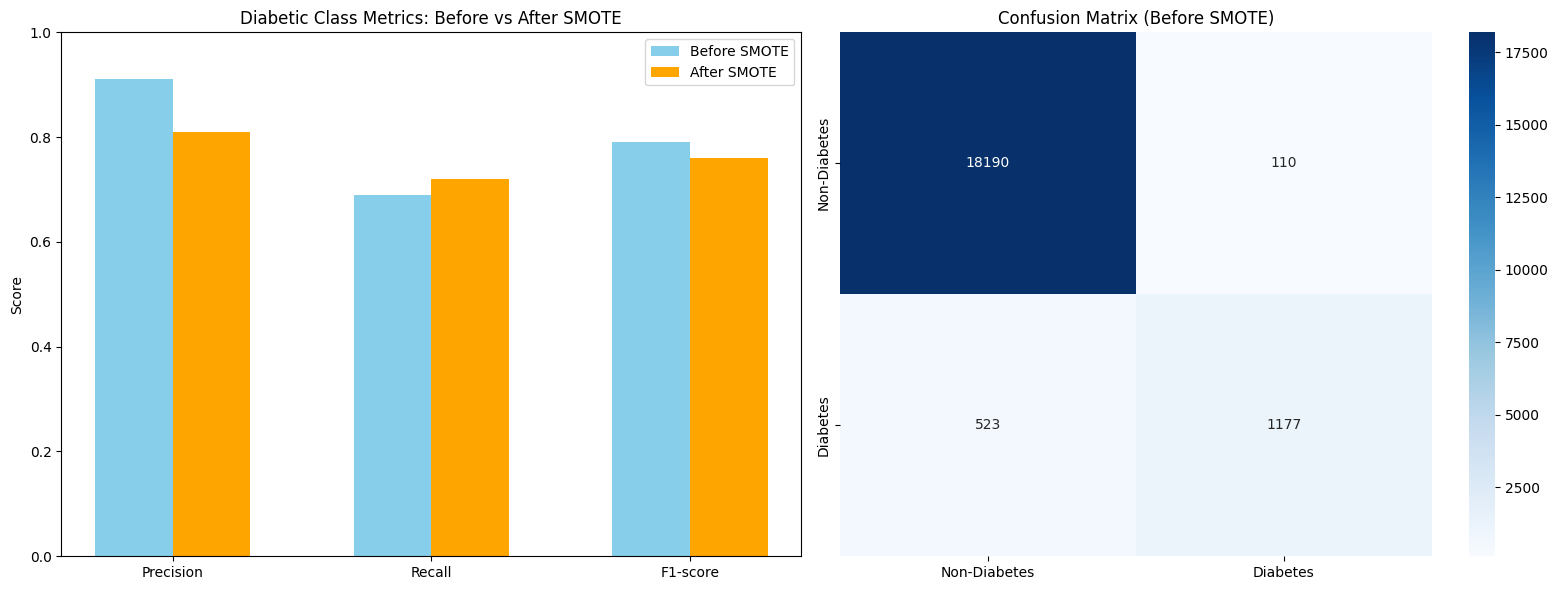

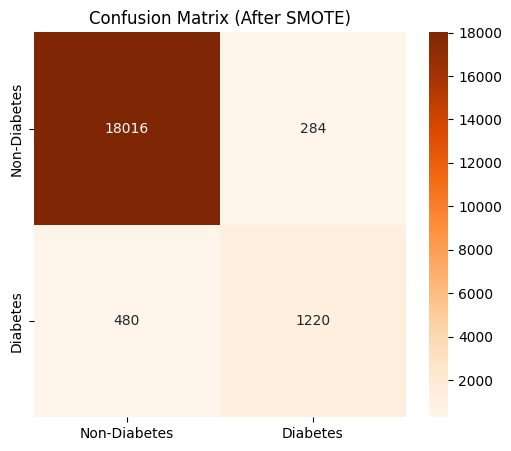

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Metrics for diabetic class
metrics_before = [0.91, 0.69, 0.79]  # precision, recall, f1-score
metrics_after  = [0.81, 0.72, 0.76]
labels = ['Precision', 'Recall', 'F1-score']
x = range(len(labels))

# Confusion matrices
cm_before = [[18190, 110], [523, 1177]]
cm_after  = [[18016, 284], [480, 1220]]

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Bar chart ---
axes[0].bar([i-0.15 for i in x], metrics_before, width=0.3, label='Before SMOTE', color='skyblue')
axes[0].bar([i+0.15 for i in x], metrics_after, width=0.3, label='After SMOTE', color='orange')
axes[0].set_ylim(0,1)
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].set_ylabel("Score")
axes[0].set_title("Diabetic Class Metrics: Before vs After SMOTE")
axes[0].legend()

# --- Confusion matrices ---
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetes','Diabetes'],
            yticklabels=['Non-Diabetes','Diabetes'], ax=axes[1])
axes[1].set_title("Confusion Matrix (Before SMOTE)")

plt.tight_layout()
plt.show()

# Optional: plot after-SMOTE confusion matrix separately
plt.figure(figsize=(6,5))
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Oranges', xticklabels=['Non-Diabetes','Diabetes'],
            yticklabels=['Non-Diabetes','Diabetes'])
plt.title("Confusion Matrix (After SMOTE)")
plt.show()


In [ ]:
#SMOTE improves recall for diabetes. Detects slightly more actual diabetics (72% vs 69%) which is crucial in healthcare - better at identifying at-risk patients
# slight trade off in precision and recall - you predict more diabetics, some are false positives--- precision drops from 0.91 to 0.81 
# Before SMOTE - the model is overconfident in predicting non-diabetics. After SMOTE predictions are more balanced 
# SMOTE improved recall but precision and F1 score fell down, because when you apply SMOTE synthetic diabetic samples change the feature distribution
# After SMOTE, Random Forest default parameters become suboptimal. Model becomes more sensitive to noise, lower precision. 
#Hyper parameter tuning should be the next step as it will lead to improve precision, recall, balance bias-variance, reduce overfitting caused by SMOTE, 
# and provide clinically better predictions. 

In [60]:
# Full code for Hyperparameter tuning after SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define model
rf_base = RandomForestClassifier(random_state=42)

# Hyperparameter search grid
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [6, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Grid search
grid = GridSearchCV(estimator=rf_base,
                    param_grid=param_grid,
                    scoring='f1',  
                    cv=3,
                    n_jobs=-1,
                    verbose=2)

# Fit on SMOTE data
grid.fit(X_train_sm, y_train_sm)

# Best model
best_rf = grid.best_estimator_
print("Best params:", grid.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [ ]:
#| Model                      | Data       | Effect                   |
#| -------------------------- | ---------- | ------------------------ |
#| **Before SMOTE (rf)**      | Imbalanced | Predicts diabetes poorly |
#| **After SMOTE (rf_smote)** | Balanced   | Detects more diabetics   | Random Forest is the same model but trained on different quality of data. 

# Fitting 3 folds for each of 216 candidates, totalling 648 fits - means 216 combinations repeated 3 times so total 648 Random Forest models trained.
# Best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
#Max_depth – none (trees can grow as deep as they want, good for complex data, RF reduces the risk of overfitting)
#Max_featurs = sqrt (at each split, the tree only looks at _ (no. of features), creates more diverse trees, improves generalization. (each tree sees different parts of the data – smarter forest) 
#Min_samples_leaf = 1 (Leaf nodes can end with just 1 sample, helps to capture small patterns)
#Min_sample_split = 2 (default behaviour, allows early splitting, nodes split if they have at least 2 samples)
#N_estimators = 400 (forest has 400 trees, more trees more stable, more accurate) takes slightly longer to train. 

# best_rf is the random forest trained on the SMOTE-balanced training set with hyperparameter tuning applied. 

In [61]:
# Model Evaluation after Tuning 
y_pred_tuned = best_rf.predict(X_test) # X_test is using the original imbalanced test set, since predictions are made on same test set, metrics look same

print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))
print(confusion_matrix(y_test, y_pred_tuned))

Accuracy: 0.96185
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18300
           1       0.81      0.72      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.89      0.85      0.87     20000
weighted avg       0.96      0.96      0.96     20000

[[18015   285]
 [  478  1222]]


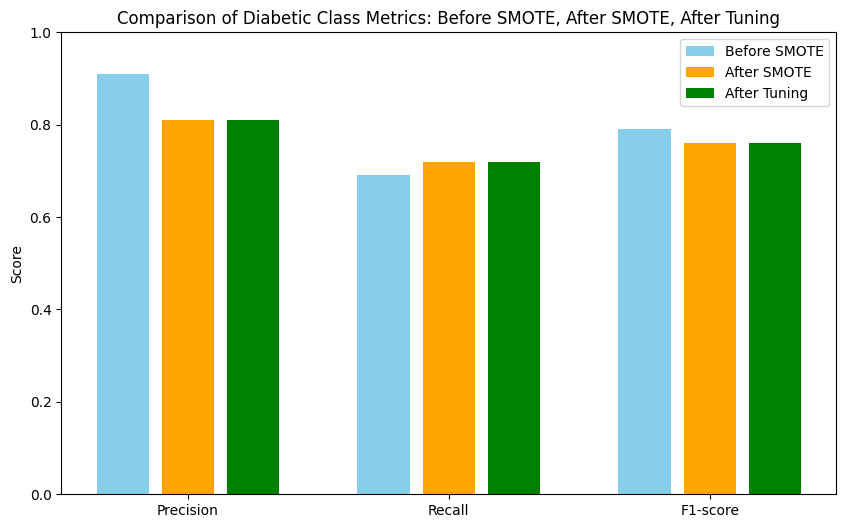

In [62]:
# compare all 3 : before SMOTE, after SMOTE and after SMOTE + Hyperparameter Tuning 
import matplotlib.pyplot as plt

# Metrics for the diabetic class (class 1)
metrics_before = [0.91, 0.69, 0.79]   # precision, recall, f1-score
metrics_after_smote = [0.81, 0.72, 0.76]
metrics_after_tuning = [0.81, 0.72, 0.76]  # same as last you shared

labels = ['Precision', 'Recall', 'F1-score']
x = range(len(labels))

plt.figure(figsize=(10,6))
plt.bar([i-0.25 for i in x], metrics_before, width=0.2, label='Before SMOTE', color='skyblue')
plt.bar(x, metrics_after_smote, width=0.2, label='After SMOTE', color='orange')
plt.bar([i+0.25 for i in x], metrics_after_tuning, width=0.2, label='After Tuning', color='green')

plt.ylim(0,1)
plt.xticks(x, labels)
plt.title("Comparison of Diabetic Class Metrics: Before SMOTE, After SMOTE, After Tuning")
plt.ylabel("Score")
plt.legend()
plt.show()


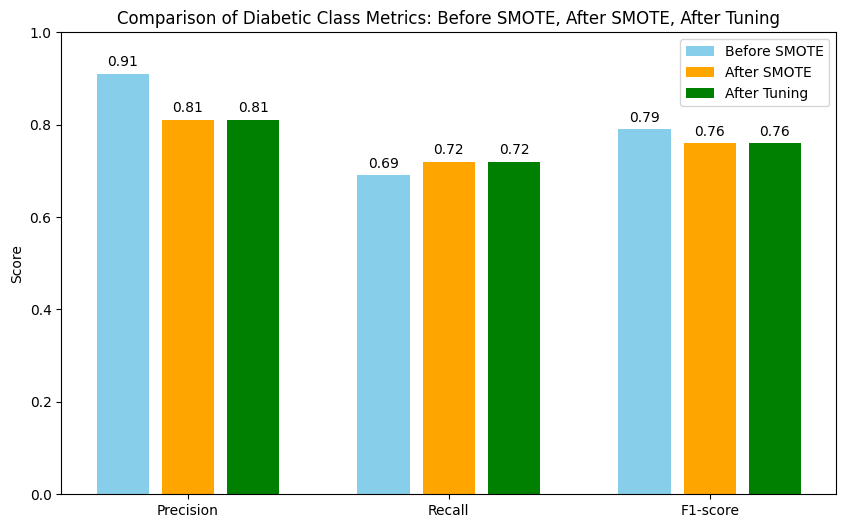

In [63]:
import matplotlib.pyplot as plt

# Metrics for diabetic class (class 1)
metrics_before = [0.91, 0.69, 0.79]   
metrics_after_smote = [0.81, 0.72, 0.76]
metrics_after_tuning = [0.81, 0.72, 0.76]  

labels = ['Precision', 'Recall', 'F1-score']
x = range(len(labels))

plt.figure(figsize=(10,6))
bars_before = plt.bar([i-0.25 for i in x], metrics_before, width=0.2, label='Before SMOTE', color='skyblue')
bars_after = plt.bar(x, metrics_after_smote, width=0.2, label='After SMOTE', color='orange')
bars_tuning = plt.bar([i+0.25 for i in x], metrics_after_tuning, width=0.2, label='After Tuning', color='green')

plt.ylim(0,1)
plt.xticks(x, labels)
plt.title("Comparison of Diabetic Class Metrics: Before SMOTE, After SMOTE, After Tuning")
plt.ylabel("Score")
plt.legend()

# Add data labels on top of each bar
for bars in [bars_before, bars_after, bars_tuning]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

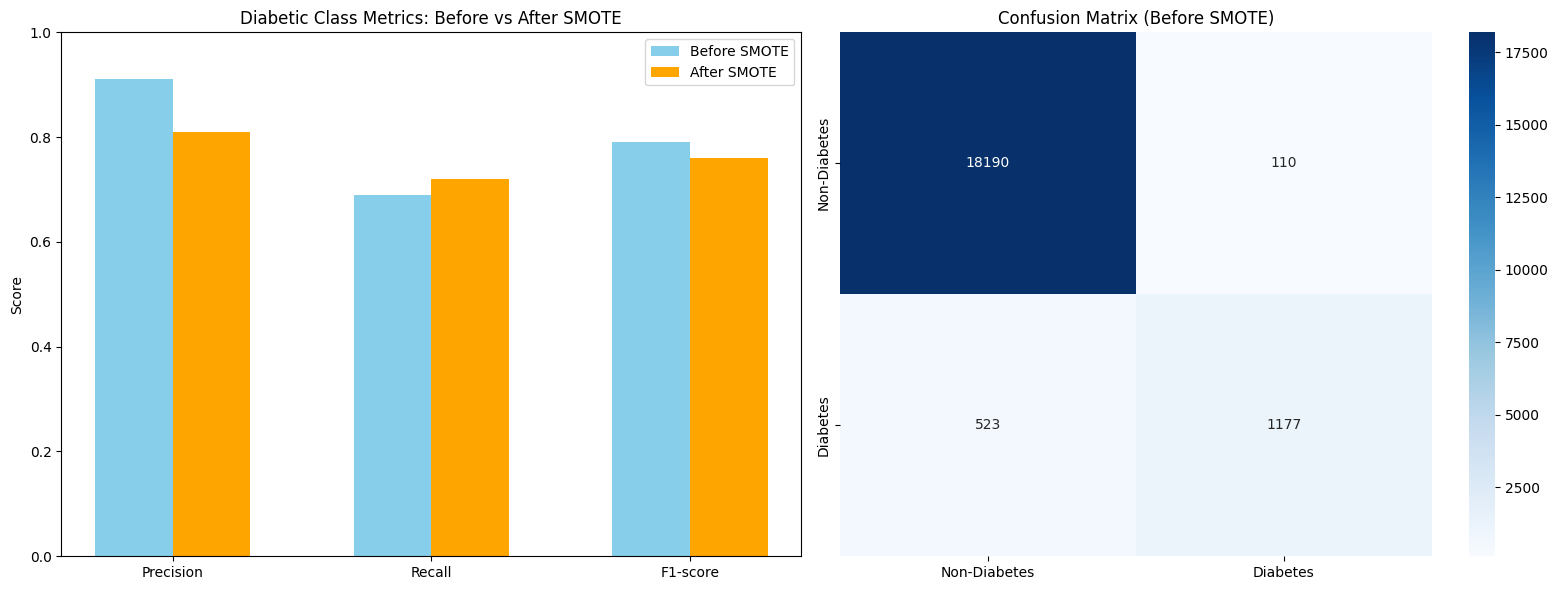

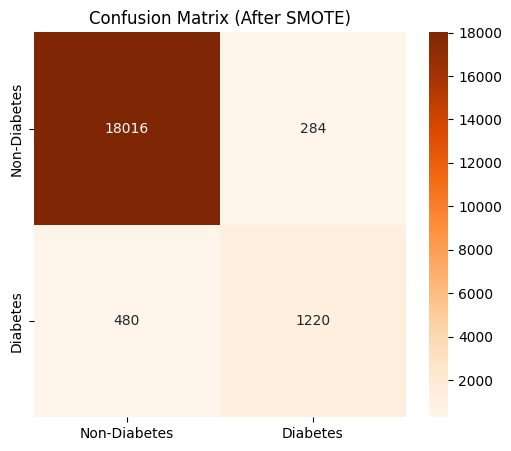

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Metrics for diabetic class
metrics_before = [0.91, 0.69, 0.79]  # precision, recall, f1-score
metrics_after  = [0.81, 0.72, 0.76]
labels = ['Precision', 'Recall', 'F1-score']
x = range(len(labels))

# Confusion matrices
cm_before = [[18190, 110], [523, 1177]]
cm_after  = [[18016, 284], [480, 1220]]

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Bar chart ---
axes[0].bar([i-0.15 for i in x], metrics_before, width=0.3, label='Before SMOTE', color='skyblue')
axes[0].bar([i+0.15 for i in x], metrics_after, width=0.3, label='After SMOTE', color='orange')
axes[0].set_ylim(0,1)
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].set_ylabel("Score")
axes[0].set_title("Diabetic Class Metrics: Before vs After SMOTE")
axes[0].legend()

# --- Confusion matrices ---
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetes','Diabetes'],
            yticklabels=['Non-Diabetes','Diabetes'], ax=axes[1])
axes[1].set_title("Confusion Matrix (Before SMOTE)")

plt.tight_layout()
plt.show()

# Optional: plot after-SMOTE confusion matrix separately
plt.figure(figsize=(6,5))
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Oranges', xticklabels=['Non-Diabetes','Diabetes'],
            yticklabels=['Non-Diabetes','Diabetes'])
plt.title("Confusion Matrix (After SMOTE)")
plt.show()


In [ ]:
#SMOTE improves recall for diabetes. Detects slightly more actual diabetics (72% vs 69%) which is crucial in healthcare - better at identifying at-risk patients
# slight trade off in precision and recall - you predict more diabetics, some are false positives--- precision drops from 0.91 to 0.81 
# Before SMOTE - the model is overconfident in predicting non-diabetics. After SMOTE predictions are more balanced


In [65]:
# Cross Validation on SMOTE training set to see improvements 
# Import required models
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [66]:
# Define cross validation strategy : Use StratifiedKFold to keep the class distribution balanced in each fold. (eg 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [67]:
# Evaluate tuned Random Forest on SMOTE Training set 
# best_rf is the hyperparameter-tuned Random Forest trained on X_train_sm, y_train_sm
# We use F1 score because it balances precision and recall which is crucial for imbalanced data

cv_scores = cross_val_score(best_rf, X_train_sm, y_train_sm, cv=cv, scoring='f1')  # focus on minority class
print("Cross-validated F1-scores (SMOTE training set):", cv_scores)
print("Mean F1-score:", cv_scores.mean())


Cross-validated F1-scores (SMOTE training set): [0.97762372 0.97620437 0.9767761  0.97826385 0.97847949]
Mean F1-score: 0.9774695071680354


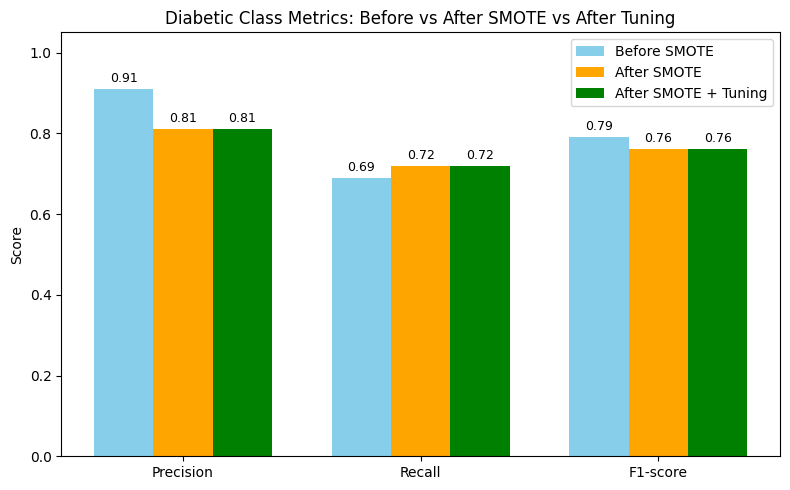

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for diabetic class
metrics_before = [0.91, 0.69, 0.79]   # Precision, Recall, F1-score
metrics_after = [0.81, 0.72, 0.76]
metrics_tuned = [0.81, 0.72, 0.76]  # After hyperparameter tuning 

labels = ['Precision', 'Recall', 'F1-score']
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x - width, metrics_before, width, label='Before SMOTE', color='skyblue')
plt.bar(x, metrics_after, width, label='After SMOTE', color='orange')
plt.bar(x + width, metrics_tuned, width, label='After SMOTE + Tuning', color='green')

# Add data labels on top of bars
for i in range(len(x)):
    plt.text(x[i]-width, metrics_before[i]+0.01, f"{metrics_before[i]:.2f}", ha='center', va='bottom', fontsize=9)
    plt.text(x[i], metrics_after[i]+0.01, f"{metrics_after[i]:.2f}", ha='center', va='bottom', fontsize=9)
    plt.text(x[i]+width, metrics_tuned[i]+0.01, f"{metrics_tuned[i]:.2f}", ha='center', va='bottom', fontsize=9)

plt.ylim(0, 1.05)
plt.xticks(x, labels)
plt.title("Diabetic Class Metrics: Before vs After SMOTE vs After Tuning")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()


In [69]:
# Optional : Evaluate accuracy and recall and precision too 

cv_acc = cross_val_score(best_rf, X_train_sm, y_train_sm, cv=cv, scoring='accuracy')
cv_recall = cross_val_score(best_rf, X_train_sm, y_train_sm, cv=cv, scoring='recall')
cv_precision = cross_val_score(best_rf, X_train_sm, y_train_sm, cv=cv, scoring='precision') # 5th dec

print("CV Accuracy:", cv_acc.mean())
print("CV Recall:", cv_recall.mean())
print("CV Precision:", cv_precision.mean())

CV Accuracy: 0.9775751366120218
CV Recall: 0.972896174863388


In [71]:
print("CV Precision:", cv_precision.mean())

CV Precision: 0.9820865910075117


In [72]:
# 5th dec as rf_smote need to be defined first 
from sklearn.ensemble import RandomForestClassifier

# --- Random Forest after SMOTE ---
rf_smote = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf_smote.fit(X_train_sm, y_train_sm)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


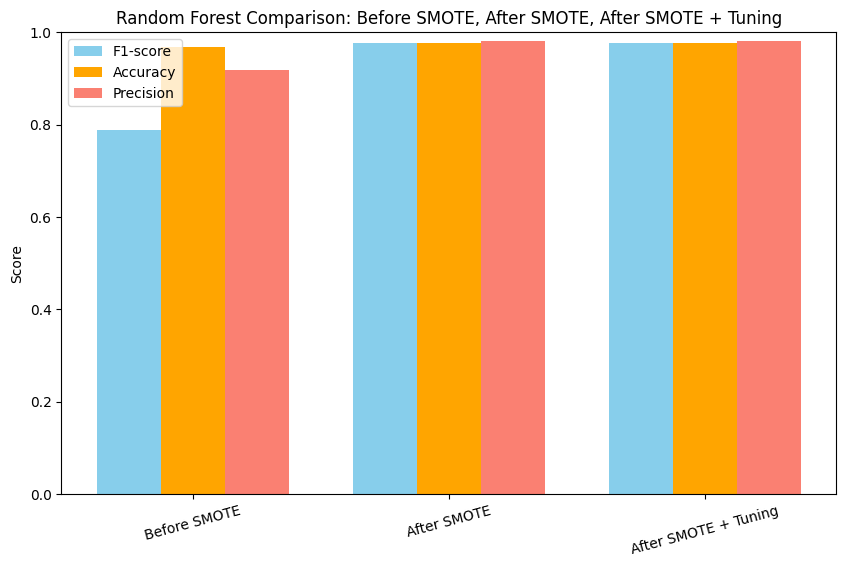

In [75]:
import numpy as np # revised code with precision scores 5th dec
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# --- Define cross-validation ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- 1. Default RF (Before SMOTE) ---
cv_f1_before = cross_val_score(rf, X_train, y_train, cv=cv, scoring='f1')
cv_acc_before = cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy')
cv_pre_before = cross_val_score(rf, X_train, y_train, cv=cv, scoring='precision')

# --- 2. RF after SMOTE ---
cv_f1_after = cross_val_score(rf_smote, X_train_sm, y_train_sm, cv=cv, scoring='f1')
cv_acc_after = cross_val_score(rf_smote, X_train_sm, y_train_sm, cv=cv, scoring='accuracy')
cv_pre_after = cross_val_score(rf_smote, X_train_sm, y_train_sm, cv=cv, scoring='precision')

# --- 3. RF after SMOTE + Hyperparameter tuning ---
cv_f1_tuned = cross_val_score(best_rf, X_train_sm, y_train_sm, cv=cv, scoring='f1')
cv_acc_tuned = cross_val_score(best_rf, X_train_sm, y_train_sm, cv=cv, scoring='accuracy')
cv_pre_tuned = cross_val_score(best_rf, X_train_sm, y_train_sm, cv=cv, scoring='precision')

# --- Collect metrics ---
labels = ['Before SMOTE', 'After SMOTE', 'After SMOTE + Tuning']
f1_scores = [cv_f1_before.mean(), cv_f1_after.mean(), cv_f1_tuned.mean()]
accuracy_scores = [cv_acc_before.mean(), cv_acc_after.mean(), cv_acc_tuned.mean()]
precision_scores = [cv_pre_before.mean(), cv_pre_after.mean(), cv_pre_tuned.mean()]  # <-- FIX

# --- Plot ---
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, f1_scores, width, label='F1-score', color='skyblue')
plt.bar(x, accuracy_scores, width, label='Accuracy', color='orange')
plt.bar(x + width, precision_scores, width, label='Precision', color='salmon')

plt.ylim(0,1)
plt.xticks(x, labels, rotation=15)
plt.title("Random Forest Comparison: Before SMOTE, After SMOTE, After SMOTE + Tuning")
plt.ylabel("Score")
plt.legend()
plt.show()


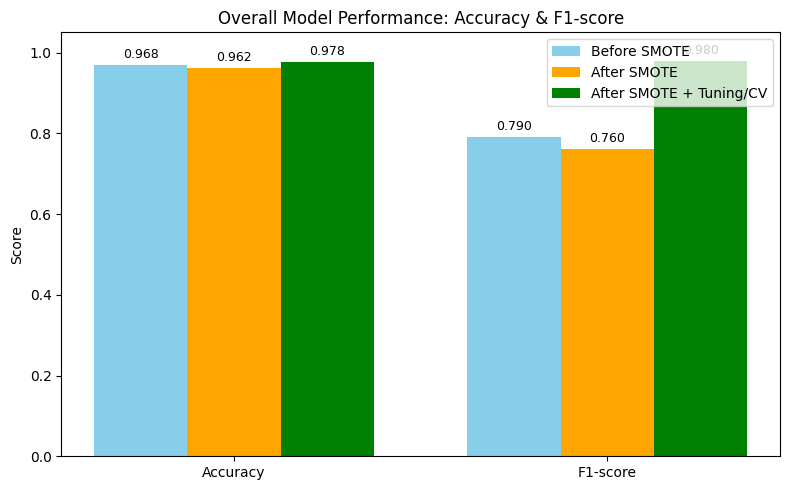

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Overall metrics
accuracy_scores = [0.96835, 0.9618, 0.97758]  # Before SMOTE, After SMOTE, After Tuning/CV
f1_scores = [0.79, 0.76, 0.98]           # F1-score / cross-validated F1 # REPUT SCORES 5th dec. 

labels = ['Accuracy', 'F1-score']
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x - width, [accuracy_scores[0], f1_scores[0]], width, label='Before SMOTE', color='skyblue')
plt.bar(x, [accuracy_scores[1], f1_scores[1]], width, label='After SMOTE', color='orange')
plt.bar(x + width, [accuracy_scores[2], f1_scores[2]], width, label='After SMOTE + Tuning/CV', color='green')

# Add data labels
for i in range(len(x)):
    plt.text(x[i]-width, [accuracy_scores[0], f1_scores[0]][i]+0.01, f"{[accuracy_scores[0], f1_scores[0]][i]:.3f}", 
             ha='center', va='bottom', fontsize=9)
    plt.text(x[i], [accuracy_scores[1], f1_scores[1]][i]+0.01, f"{[accuracy_scores[1], f1_scores[1]][i]:.3f}", 
             ha='center', va='bottom', fontsize=9)
    plt.text(x[i]+width, [accuracy_scores[2], f1_scores[2]][i]+0.01, f"{[accuracy_scores[2], f1_scores[2]][i]:.3f}", 
             ha='center', va='bottom', fontsize=9)

plt.ylim(0, 1.05)
plt.xticks(x, labels)
plt.title("Overall Model Performance: Accuracy & F1-score")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()


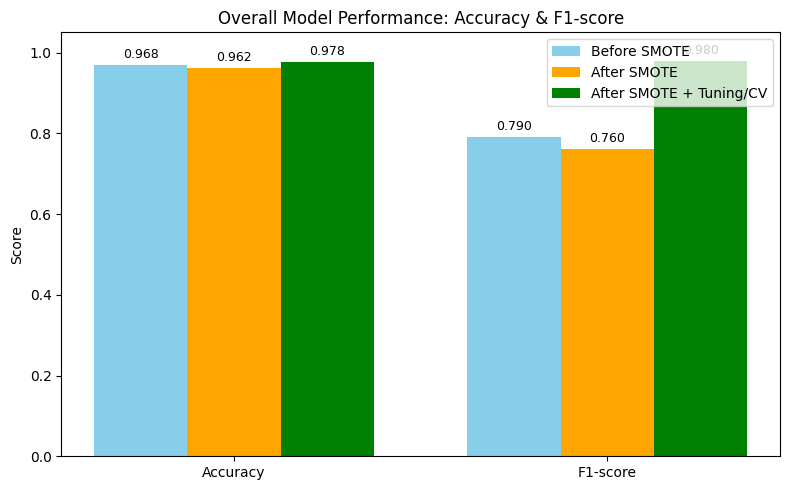

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Overall metrics
accuracy_scores = [0.96835, 0.9618, 0.97758]  # Before SMOTE, After SMOTE, After Tuning/CV
f1_scores = [0.79, 0.76, 0.98]           # F1-score / cross-validated F1 # REPUT SCORES 5th dec. 

labels = ['Accuracy', 'F1-score']
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x - width, [accuracy_scores[0], f1_scores[0]], width, label='Before SMOTE', color='skyblue')
plt.bar(x, [accuracy_scores[1], f1_scores[1]], width, label='After SMOTE', color='orange')
plt.bar(x + width, [accuracy_scores[2], f1_scores[2]], width, label='After SMOTE + Tuning/CV', color='green')

# Add data labels
for i in range(len(x)):
    plt.text(x[i]-width, [accuracy_scores[0], f1_scores[0]][i]+0.01, f"{[accuracy_scores[0], f1_scores[0]][i]:.3f}", 
             ha='center', va='bottom', fontsize=9)
    plt.text(x[i], [accuracy_scores[1], f1_scores[1]][i]+0.01, f"{[accuracy_scores[1], f1_scores[1]][i]:.3f}", 
             ha='center', va='bottom', fontsize=9)
    plt.text(x[i]+width, [accuracy_scores[2], f1_scores[2]][i]+0.01, f"{[accuracy_scores[2], f1_scores[2]][i]:.3f}", 
             ha='center', va='bottom', fontsize=9)

plt.ylim(0, 1.05)
plt.xticks(x, labels)
plt.title("Overall Model Performance: Accuracy & F1-score")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()


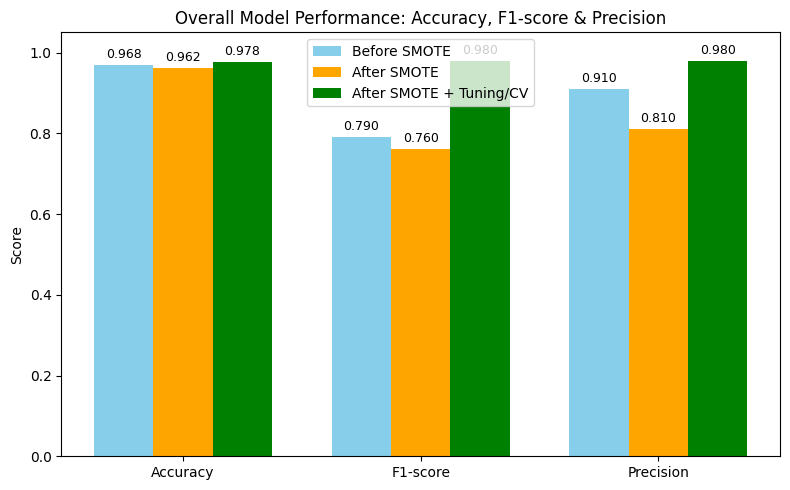

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Overall metrics
accuracy_scores = [0.96835, 0.9618, 0.97758]   # Before SMOTE, After SMOTE, After Tuning/CV
f1_scores       = [0.79, 0.76, 0.98]           # F1-score
precision_scores= [0.91, 0.81, 0.98]           # Precision

labels = ['Accuracy', 'F1-score', 'Precision']
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8,5))

# Bars: each metric gets its own set of values
plt.bar(x - width, [accuracy_scores[0], f1_scores[0], precision_scores[0]], 
        width, label='Before SMOTE', color='skyblue')
plt.bar(x, [accuracy_scores[1], f1_scores[1], precision_scores[1]], 
        width, label='After SMOTE', color='orange')
plt.bar(x + width, [accuracy_scores[2], f1_scores[2], precision_scores[2]], 
        width, label='After SMOTE + Tuning/CV', color='green')

# Add data labels for all three metrics
for i in range(len(x)):
    plt.text(x[i]-width, [accuracy_scores[0], f1_scores[0], precision_scores[0]][i]+0.01,
             f"{[accuracy_scores[0], f1_scores[0], precision_scores[0]][i]:.3f}", 
             ha='center', va='bottom', fontsize=9)
    plt.text(x[i], [accuracy_scores[1], f1_scores[1], precision_scores[1]][i]+0.01,
             f"{[accuracy_scores[1], f1_scores[1], precision_scores[1]][i]:.3f}", 
             ha='center', va='bottom', fontsize=9)
    plt.text(x[i]+width, [accuracy_scores[2], f1_scores[2], precision_scores[2]][i]+0.01,
             f"{[accuracy_scores[2], f1_scores[2], precision_scores[2]][i]:.3f}", 
             ha='center', va='bottom', fontsize=9)

plt.ylim(0, 1.05)
plt.xticks(x, labels)
plt.title("Overall Model Performance: Accuracy, F1-score & Precision")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()



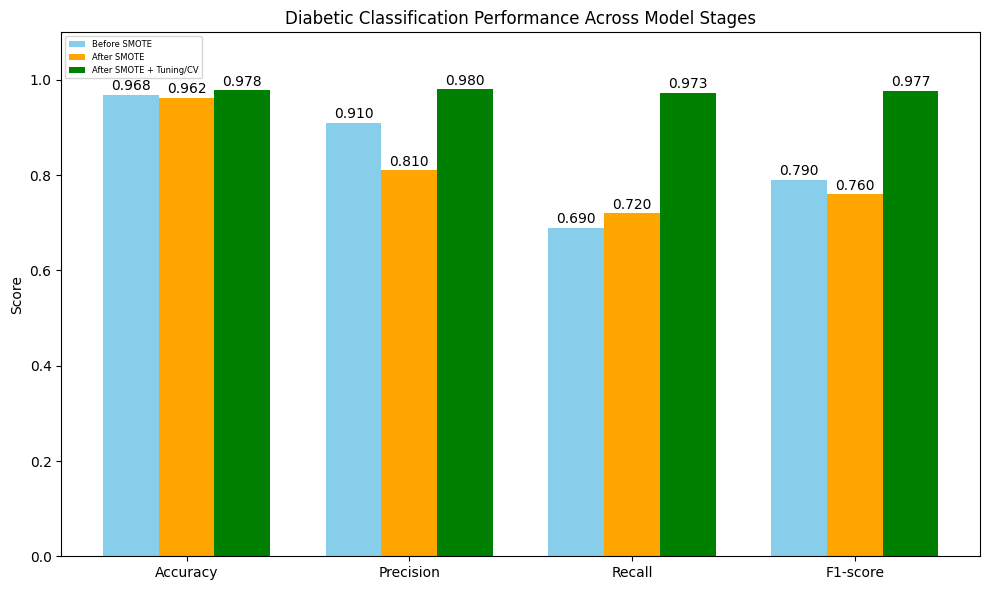

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics from your table
accuracy = [0.968, 0.962, 0.978]
precision = [0.91, 0.81, 0.98]
recall = [0.69, 0.72, 0.973]
f1 = [0.79, 0.76, 0.977]

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10,6))

# Bar groups
plt.bar(x - width, [accuracy[0], precision[0], recall[0], f1[0]], width, label='Before SMOTE', color='skyblue')
plt.bar(x,         [accuracy[1], precision[1], recall[1], f1[1]], width, label='After SMOTE', color='orange')
plt.bar(x + width, [accuracy[2], precision[2], recall[2], f1[2]], width, label='After SMOTE + Tuning/CV', color='green')

# Add value labels
for i in range(len(x)):
    plt.text(x[i]-width, [accuracy[0], precision[0], recall[0], f1[0]][i]+0.01, f"{[accuracy[0], precision[0], recall[0], f1[0]][i]:.3f}", ha='center')
    plt.text(x[i],       [accuracy[1], precision[1], recall[1], f1[1]][i]+0.01, f"{[accuracy[1], precision[1], recall[1], f1[1]][i]:.3f}", ha='center')
    plt.text(x[i]+width, [accuracy[2], precision[2], recall[2], f1[2]][i]+0.01, f"{[accuracy[2], precision[2], recall[2], f1[2]][i]:.3f}", ha='center')

# Final touches
plt.ylim(0, 1.1)
plt.xticks(x, labels)
plt.ylabel("Score")
plt.title("Diabetic Classification Performance Across Model Stages")
plt.legend(prop={'size' : 6})
plt.tight_layout()
plt.show()


In [77]:
import joblib

# Save the trained model
joblib.dump(best_rf, "final_rf_model.pkl")
print("Model saved as final_rf_model.pkl")


Model saved as final_rf_model.pkl


In [78]:
import joblib

# Load the saved model
final_model = joblib.load("final_rf_model.pkl")

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Example: hyperparameter tuned Random Forest
best_params = {'n_estimators': 400,
               'max_depth': None,
               'max_features': 'sqrt',
               'min_samples_split': 2,
               'min_samples_leaf': 1,
               'random_state': 42}

# Assign the model to a variable
final_rf_model = RandomForestClassifier(**best_params)
final_rf_model.fit(X_train_sm, y_train_sm)  # Train on SMOTE-balanced training set

,n_estimators,400
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [80]:
import joblib

# Specify the full path where you want to save the model
model_path = r"C:\Users\sit\Documents\01Development\Capstone2\sctp-capstone-ii-25\sctp-capstone-ii-25\final_rf_model.pkl"

# Save the model
joblib.dump(final_rf_model, model_path)

print(f"Model saved at: {model_path}")

Model saved at: C:\Users\sit\Documents\01Development\Capstone2\sctp-capstone-ii-25\sctp-capstone-ii-25\final_rf_model.pkl


In [ ]:
# Proceed to Streamlit!